In [4]:
pip install scikit-learn-intelex

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [7]:
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [10]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings("ignore")

import ppscore as pps
#Import Library RobustScaler
from sklearn.preprocessing import RobustScaler
#Cluster Model
from sklearnex.cluster import KMeans 
from sklearn.metrics import silhouette_score

In [2]:
data = pd.read_csv('AppleStore.csv')
data.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [3]:
#drop column (Unnamed) as semiler ID column
data.drop(['Unnamed: 0'], axis=1 ,inplace=True)
#show data after drop
data.head(2)

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1


In [4]:
#data about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                7197 non-null   int64  
 1   track_name        7197 non-null   object 
 2   size_bytes        7197 non-null   int64  
 3   currency          7197 non-null   object 
 4   price             7197 non-null   float64
 5   rating_count_tot  7197 non-null   int64  
 6   rating_count_ver  7197 non-null   int64  
 7   user_rating       7197 non-null   float64
 8   user_rating_ver   7197 non-null   float64
 9   ver               7197 non-null   object 
 10  cont_rating       7197 non-null   object 
 11  prime_genre       7197 non-null   object 
 12  sup_devices.num   7197 non-null   int64  
 13  ipadSc_urls.num   7197 non-null   int64  
 14  lang.num          7197 non-null   int64  
 15  vpp_lic           7197 non-null   int64  
dtypes: float64(3), int64(8), object(5)
memory 

In [5]:
#show shape of data 7197 Row and 16 columns
data.shape

(7197, 16)

In [6]:
data.isnull().sum().sum()
#not found null data

0

In [7]:
data.currency.value_counts()
#All of Apps has same currency paid

USD    7197
Name: currency, dtype: int64

In [8]:
data.nunique()
#target maybe vpp_lic

id                  7197
track_name          7195
size_bytes          7107
currency               1
price                 36
rating_count_tot    3185
rating_count_ver    1138
user_rating           10
user_rating_ver       10
ver                 1590
cont_rating            4
prime_genre           23
sup_devices.num       20
ipadSc_urls.num        6
lang.num              57
vpp_lic                2
dtype: int64

In [9]:
#How do you visualize price distribution of paid apps ?
data.price.value_counts()
#4056 free apps
#another apps is paid

0.00      4056
0.99       728
2.99       683
1.99       621
4.99       394
3.99       277
6.99       166
9.99        81
5.99        52
7.99        33
14.99       21
19.99       13
8.99         9
24.99        8
29.99        6
13.99        6
11.99        6
12.99        5
15.99        4
17.99        3
59.99        3
39.99        2
20.99        2
23.99        2
49.99        2
22.99        2
27.99        2
16.99        2
299.99       1
21.99        1
47.99        1
99.99        1
74.99        1
34.99        1
18.99        1
249.99       1
Name: price, dtype: int64

<Axes: xlabel='price', ylabel='Density'>

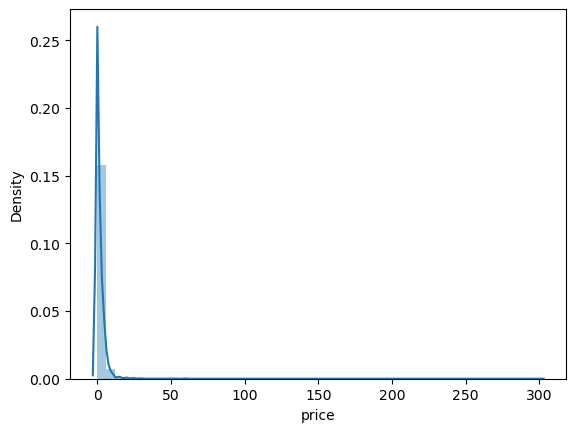

In [10]:
sns.distplot(data.price)

In [11]:
#price will be zero 
free_apps = data[(data.price==0.00)]

paid_apps  = data[(data.price>0)]

In [12]:
free_apps.head(2)

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
1,281796108,Evernote - stay organized,158578688,USD,0.0,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.0,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1


In [13]:
paid_apps.head(2)

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
5,283619399,Shanghai Mahjong,10485713,USD,0.99,8253,5516,4.0,4.0,1.8,4+,Games,47,5,1,1


In [14]:
paid_apps.price.value_counts()

0.99      728
2.99      683
1.99      621
4.99      394
3.99      277
6.99      166
9.99       81
5.99       52
7.99       33
14.99      21
19.99      13
8.99        9
24.99       8
29.99       6
13.99       6
11.99       6
12.99       5
15.99       4
17.99       3
59.99       3
39.99       2
20.99       2
23.99       2
49.99       2
22.99       2
27.99       2
16.99       2
299.99      1
21.99       1
47.99       1
99.99       1
74.99       1
34.99       1
18.99       1
249.99      1
Name: price, dtype: int64

In [15]:
#The number of apps decreases with increasing his price
free_apps.price.value_counts()

0.0    4056
Name: price, dtype: int64

<Axes: xlabel='price', ylabel='Density'>

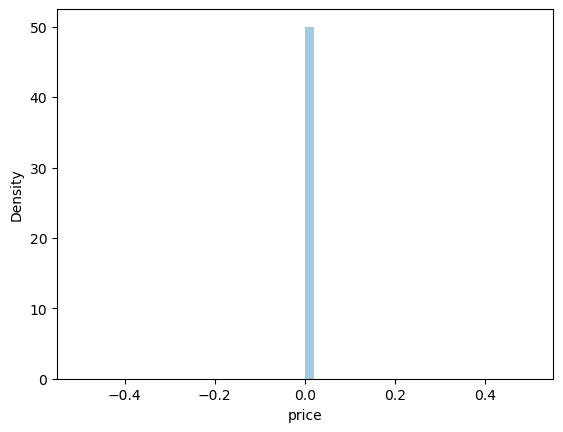

In [16]:
sns.distplot(free_apps['price'])

<Axes: xlabel='price', ylabel='Density'>

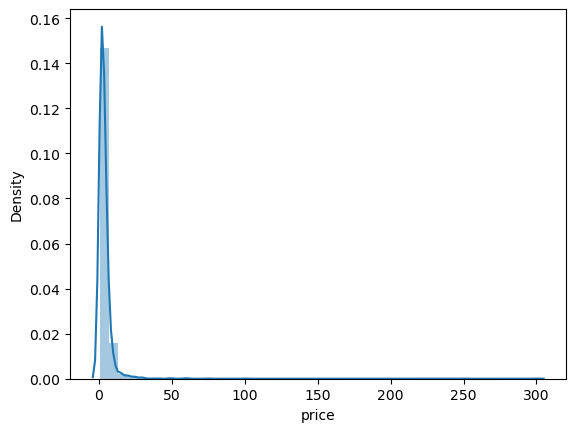

In [17]:
sns.distplot(paid_apps['price'])

<Axes: xlabel='price', ylabel='Count'>

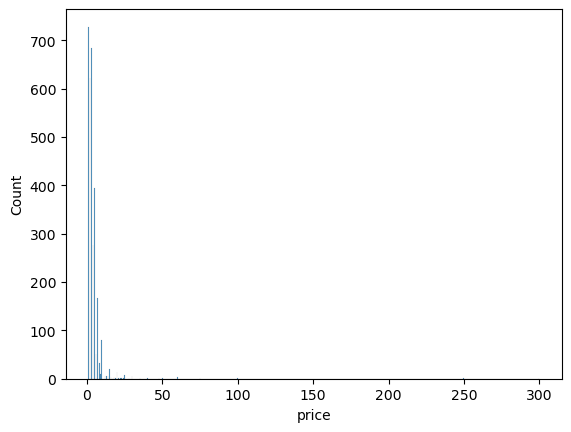

In [18]:
sns.histplot(paid_apps['price'])

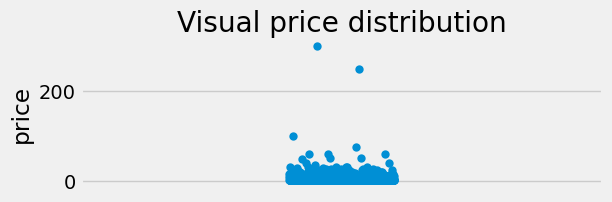

In [19]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(6,4))

plt.subplot(2,1,2)
plt.title('Visual price distribution')
sns.stripplot(data=paid_apps,y='price',jitter= True,orient = 'h' ,size=6)
plt.show()

In [20]:
#from this graph The number of apps that have a price greater than 50 is few compared to before 50 USD
Top_Apps=paid_apps[paid_apps.price>50][['track_name','price','prime_genre','user_rating']]
Top_Apps
#7 Top apps with price, prime_genre and user rating

,track_name,price,prime_genre,user_rating
115,Proloquo2Go - Symbol-based AAC,249.99,Education,4.0
162,NAVIGON Europe,74.99,Navigation,3.5
1136,Articulation Station Pro,59.99,Education,4.5
1479,LAMP Words For Life,299.99,Education,4.0
2181,Articulation Test Center Pro,59.99,Education,4.5
2568,KNFB Reader,99.99,Productivity,4.5
3238,FineScanner Pro - PDF Document Scanner App + OCR,59.99,Business,4.0


In [21]:
def visualizer(x, y, plot_type, title, xlabel, ylabel, rotation=False, rotation_value=60, figsize=(15,8)):
    plt.figure(figsize=figsize)
    
    if plot_type == "bar":  
        sns.barplot(x=x, y=y)
    elif plot_type == "count":  
        sns.countplot(x)
   
    plt.title(title, fontsize=20)
    plt.xlabel(xlabel, fontsize=18)
    plt.ylabel(ylabel, fontsize=18)
    plt.yticks(fontsize=13)
    if rotation == True:
        plt.xticks(fontsize=13,rotation=rotation_value)
    plt.show()

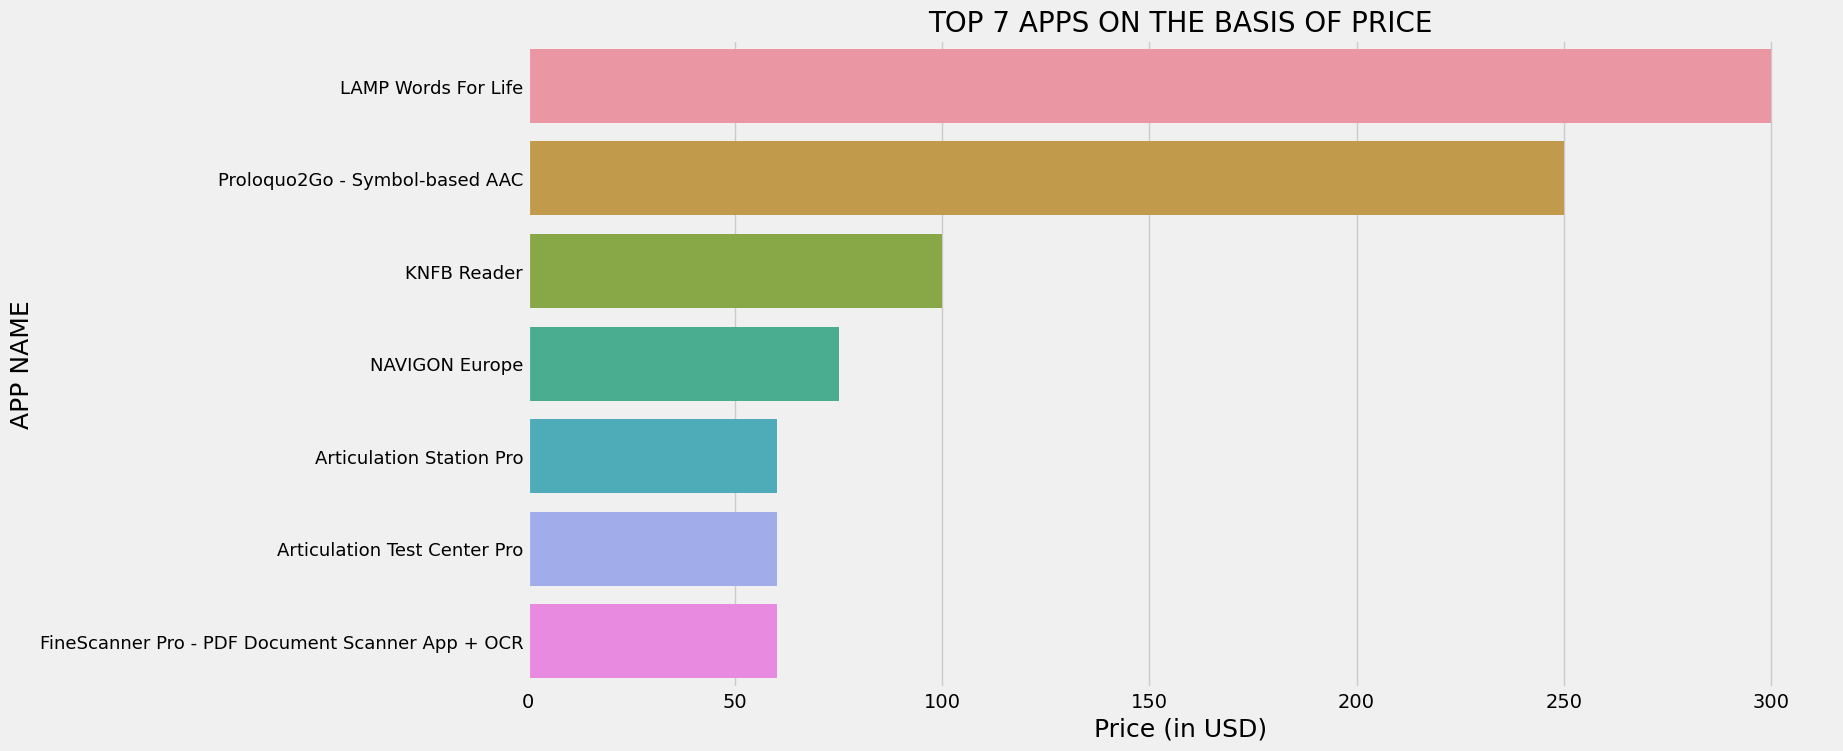

In [22]:
Top_Apps = Top_Apps.sort_values('price', ascending=False)

visualizer(Top_Apps.price,Top_Apps.track_name, "bar", "TOP 7 APPS ON THE BASIS OF PRICE","Price (in USD)","APP NAME")
#names of track in y axis to be readable

In [23]:

paid_apps.head(2)

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
5,283619399,Shanghai Mahjong,10485713,USD,0.99,8253,5516,4.0,4.0,1.8,4+,Games,47,5,1,1


In [24]:
#sum of all paid apps 
sum_paid = paid_apps.price.value_counts().sum()
sum_paid

3141

In [25]:
#sum of all free apps
sum_free = free_apps.price.value_counts().sum()
sum_free

4056

In [26]:
#catogeries and prices
data.prime_genre.value_counts()

Games                3862
Entertainment         535
Education             453
Photo & Video         349
Utilities             248
Health & Fitness      180
Productivity          178
Social Networking     167
Lifestyle             144
Music                 138
Shopping              122
Sports                114
Book                  112
Finance               104
Travel                 81
News                   75
Weather                72
Reference              64
Food & Drink           63
Business               57
Navigation             46
Medical                23
Catalogs               10
Name: prime_genre, dtype: int64

In [27]:
new_data_cate = data.groupby([data.prime_genre])[['id']].count().reset_index().sort_values('id' ,ascending = False)
new_data_cate.columns = ['prime_genre','# of Apps']
new_data_cate.head()
#Categories and number of apps in each category

,prime_genre,# of Apps
7,Games,3862
4,Entertainment,535
3,Education,453
14,Photo & Video,349
21,Utilities,248


In [28]:
#Top_Categories accorrding number of apps
new_data_cate.head(10)

,prime_genre,# of Apps
7,Games,3862
4,Entertainment,535
3,Education,453
14,Photo & Video,349
21,Utilities,248
8,Health & Fitness,180
15,Productivity,178
18,Social Networking,167
9,Lifestyle,144
11,Music,138


<Axes: xlabel='# of Apps', ylabel='prime_genre'>

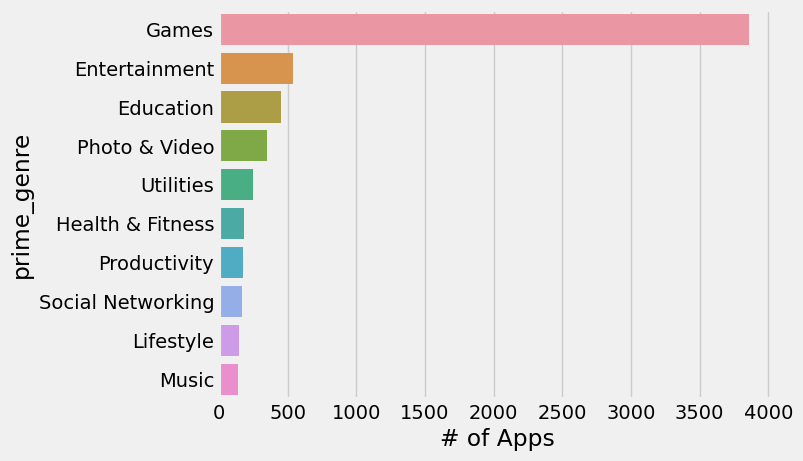

In [29]:
sns.barplot(y = 'prime_genre',x = '# of Apps', data=new_data_cate.head(10))

In [30]:
#Lower Categories according number of apps Categories unpopular
new_data_cate.tail(10)

,prime_genre,# of Apps
5,Finance,104
20,Travel,81
13,News,75
22,Weather,72
16,Reference,64
6,Food & Drink,63
1,Business,57
12,Navigation,46
10,Medical,23
2,Catalogs,10


<Axes: xlabel='# of Apps', ylabel='prime_genre'>

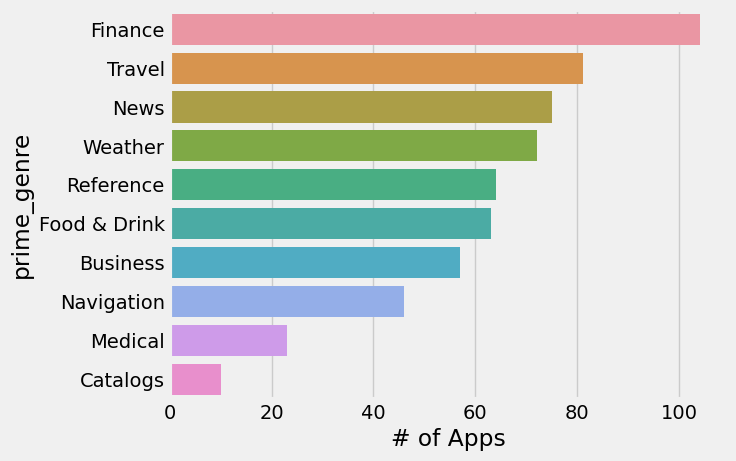

In [31]:
# lower catgories
sns.barplot(x= '# of Apps' , y = 'prime_genre' , data = new_data_cate.tail(10))

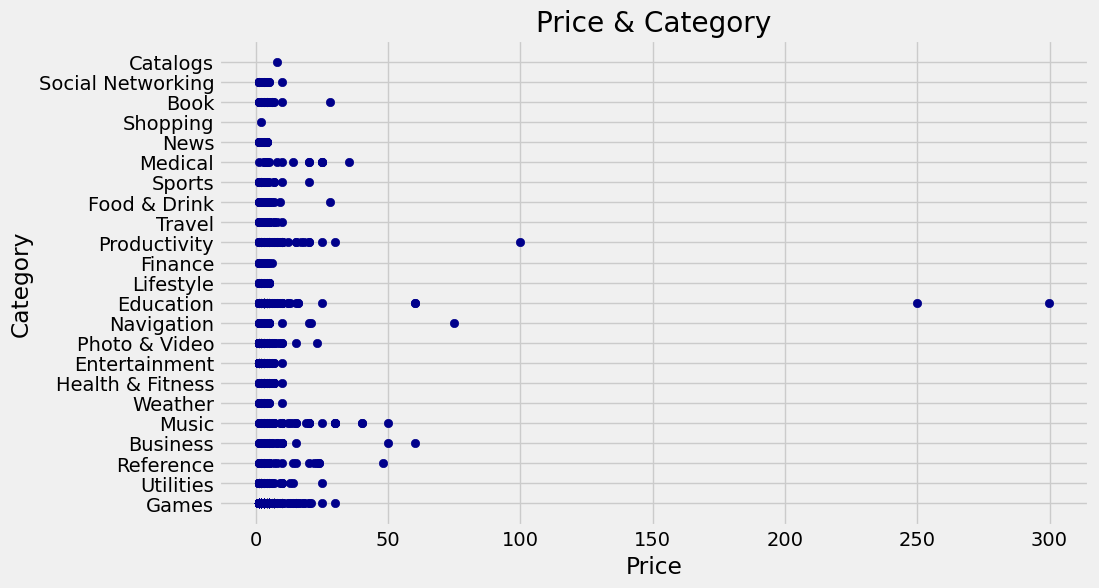

In [32]:

plt.figure(figsize=(10,6))
plt.scatter(y=paid_apps.prime_genre ,x=paid_apps.price,c='DarkBlue')
plt.title('Price & Category')
plt.xlabel('Price')
plt.ylabel('Category')
plt.show()

In [33]:
#Top Price in important Category (Business , Navigation , Education , Productivity )
#in another side price for all of apps less than 50 USD
#Education Apps has a higher price
#Shopping Apps has a lower price

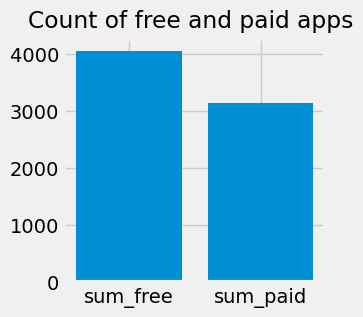

In [34]:
#What about paid apps Vs Free apps ?
names = ['sum_free', 'sum_paid']
values = [sum_free, sum_paid]
plt.figure(figsize=(3, 3))
plt.suptitle('Count of free and paid apps')
plt.bar(names, values)
plt.show()

In [35]:
print('number of Catigories in free apps is' ,  len(free_apps.prime_genre.value_counts().index))
print('number of Catigories in paid apps is' ,  len(paid_apps.prime_genre.value_counts().index))
#all categories has free & paid apps
#both are equal

number of Catigories in free apps is 23
number of Catigories in paid apps is 23


In [36]:
#catgories wise free app and paid app
free = free_apps.prime_genre.value_counts().sort_index().to_frame()
paid = paid_apps.prime_genre.value_counts().sort_index().to_frame()
total = data.prime_genre.value_counts().sort_index().to_frame()
free.columns=['free']
paid.columns=['paid']
total.columns=['total']
fig  =free.join(paid).join(total)
fig['%paid'] = fig.paid*100 /fig.total
fig['%free'] = fig.free*100/ fig.total
fig

,free,paid,total,%paid,%free
Book,66,46,112,41.071429,58.928571
Business,20,37,57,64.912281,35.087719
Catalogs,9,1,10,10.000000,90.000000
Education,132,321,453,70.860927,29.139073
Entertainment,334,201,535,37.570093,62.429907
Finance,84,20,104,19.230769,80.769231
Food & Drink,43,20,63,31.746032,68.253968
Games,2257,1605,3862,41.558778,58.441222
Health & Fitness,76,104,180,57.777778,42.222222
Lifestyle,94,50,144,34.722222,65.277778


In [37]:
#In general  of Free apps greater than # of paid apps but in (Business , Education ,Health ,Fitness,Medical,Music,Navigation ,Photo & Video,Productivity,Reference,Utilities,Weather

<Figure size 1500x1000 with 0 Axes>

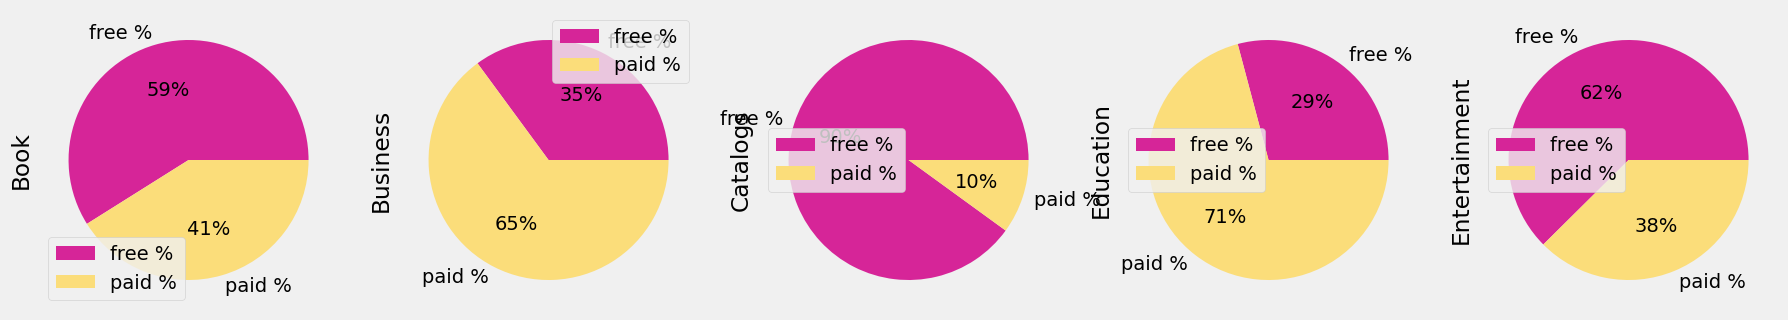

In [38]:
# for pie chart
pies = fig[['%free','%paid']].head()
pies.columns=['free %','paid %']
plt.figure(figsize=(15,10))
pies.T.plot.pie(subplots=True,figsize=(20,4),colors=['#D62598','#FBDD7A'],autopct = '%1.0f%%')
plt.show()


In [39]:
#Cataloge has Higher # of Free-Apps

#Education has Higher # of Paid-Apps

In [40]:
data[data['rating_count_tot']==data['rating_count_tot'].max()]
#Most rated & highest total rating for all version app:

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
16,284882215,Facebook,389879808,USD,0.0,2974676,212,3.5,3.5,95.0,4+,Social Networking,37,1,29,1


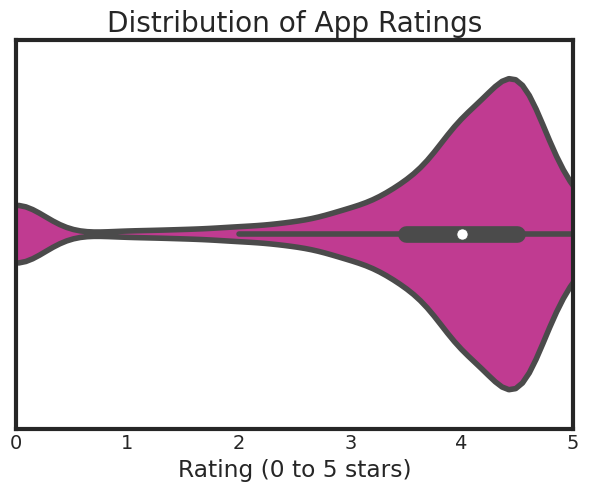

In [41]:
#paid apps rating
sns.set_style('white')
sns.violinplot(x=paid_apps['user_rating'],color='#D62598')
plt.xlim(0,5)
plt.xlabel('Rating (0 to 5 stars)')
_ = plt.title('Distribution of App Ratings')
#maxi

In [42]:
#paid apps maximum will be 4 star rating
paid_apps.cont_rating.value_counts()

4+     1967
9+      549
12+     450
17+     175
Name: cont_rating, dtype: int64

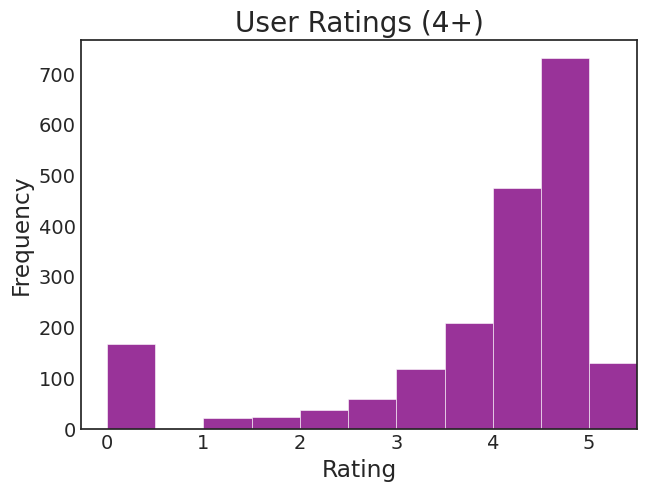

In [43]:
bins = (0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5)
plt.style.use('seaborn-white')
plt.hist(paid_apps[paid_apps['cont_rating']=='4+']['user_rating'],alpha=.8,bins=bins,color='purple')
plt.xticks((0,1,2,3,4,5))
plt.title('User Ratings (4+)')
plt.xlabel('Rating')
plt.ylabel('Frequency')
_ = plt.xlim(right=5.5)

In [44]:
#Rating of paid Apps between 3.5 - 5
#maybe say is good paid apps

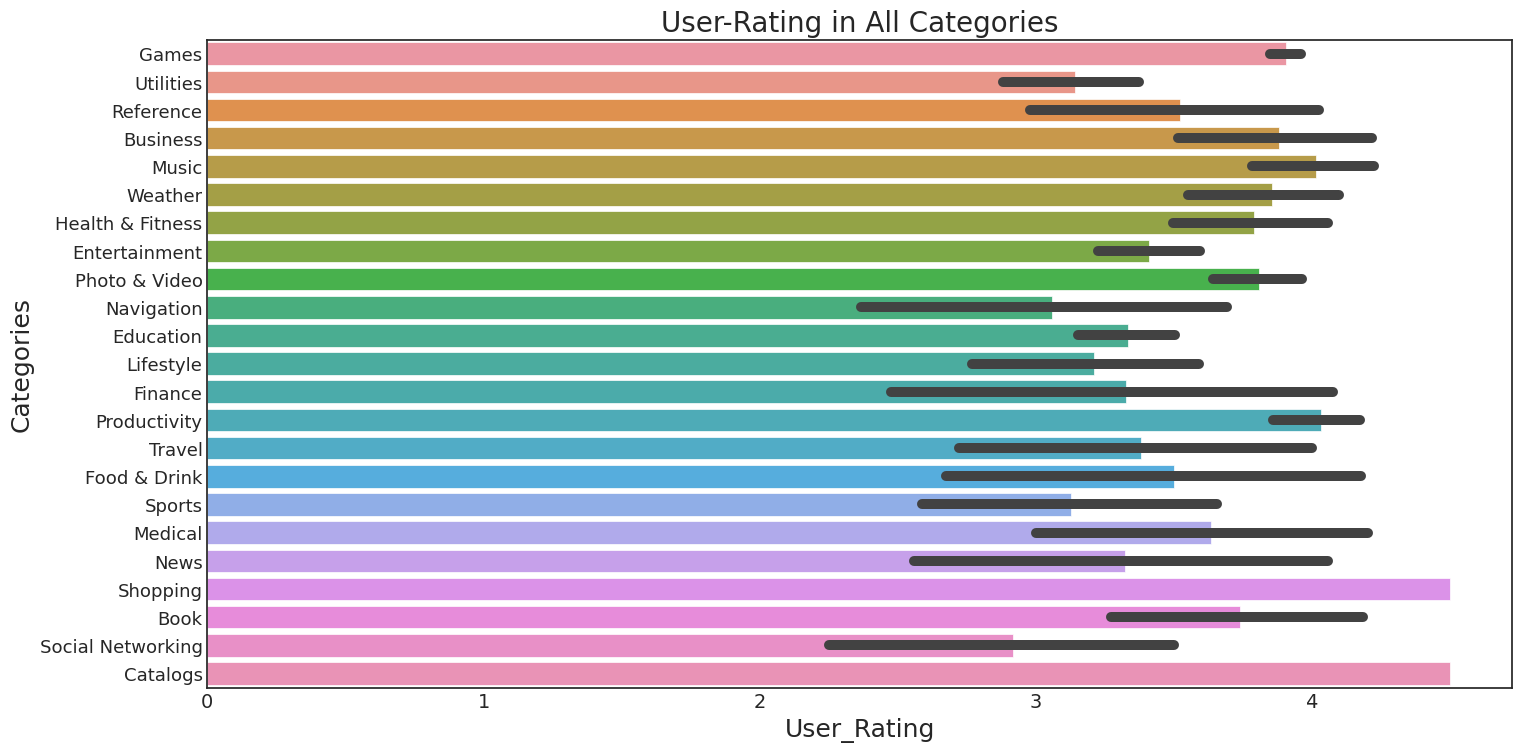

In [45]:
visualizer(paid_apps['user_rating'],paid_apps.prime_genre, "bar", "User-Rating in All Categories","User_Rating","Categories")
#higher Rating in Shopping & Catalogs


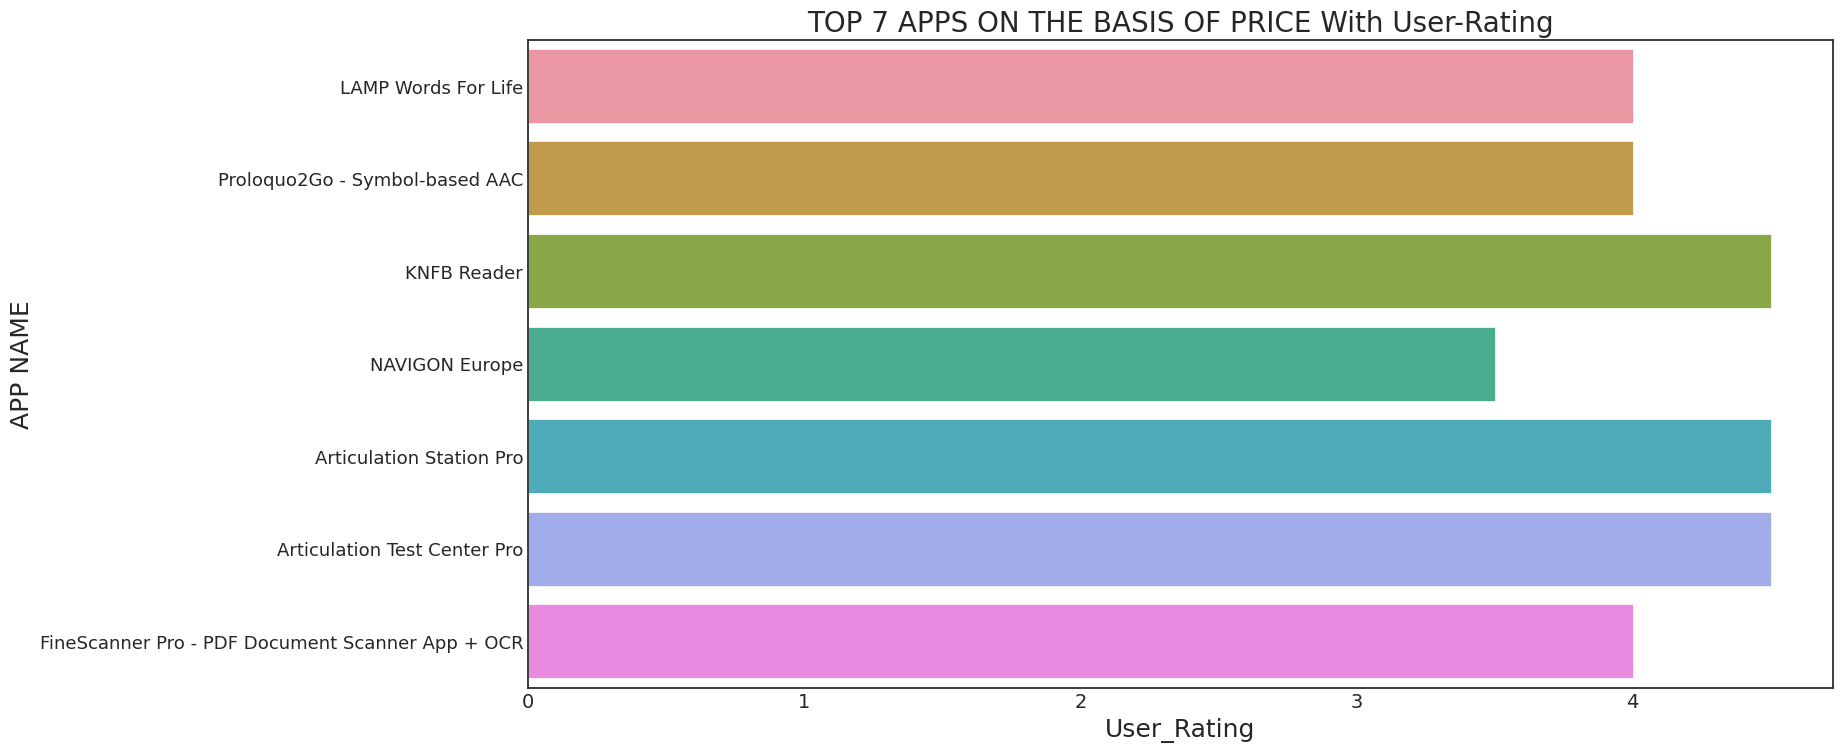

In [46]:
Top_Apps = Top_Apps.sort_values('price', ascending=False)

visualizer(Top_Apps.user_rating,Top_Apps.track_name, "bar", "TOP 7 APPS ON THE BASIS OF PRICE With User-Rating","User_Rating","APP NAME")
#names of track in y axis to be readable
#apps has high price also has high user-rating acording for that paid apps is good enough

In [47]:
Lower_Apps=paid_apps[paid_apps.price<=50][['track_name','price','prime_genre','user_rating']]
Lower_Apps.head()

,track_name,price,prime_genre,user_rating
0,PAC-MAN Premium,3.99,Games,4.0
5,Shanghai Mahjong,0.99,Games,4.0
8,PCalc - The Best Calculator,9.99,Utilities,4.5
9,Ms. PAC-MAN,3.99,Games,4.0
10,Solitaire by MobilityWare,4.99,Games,4.5


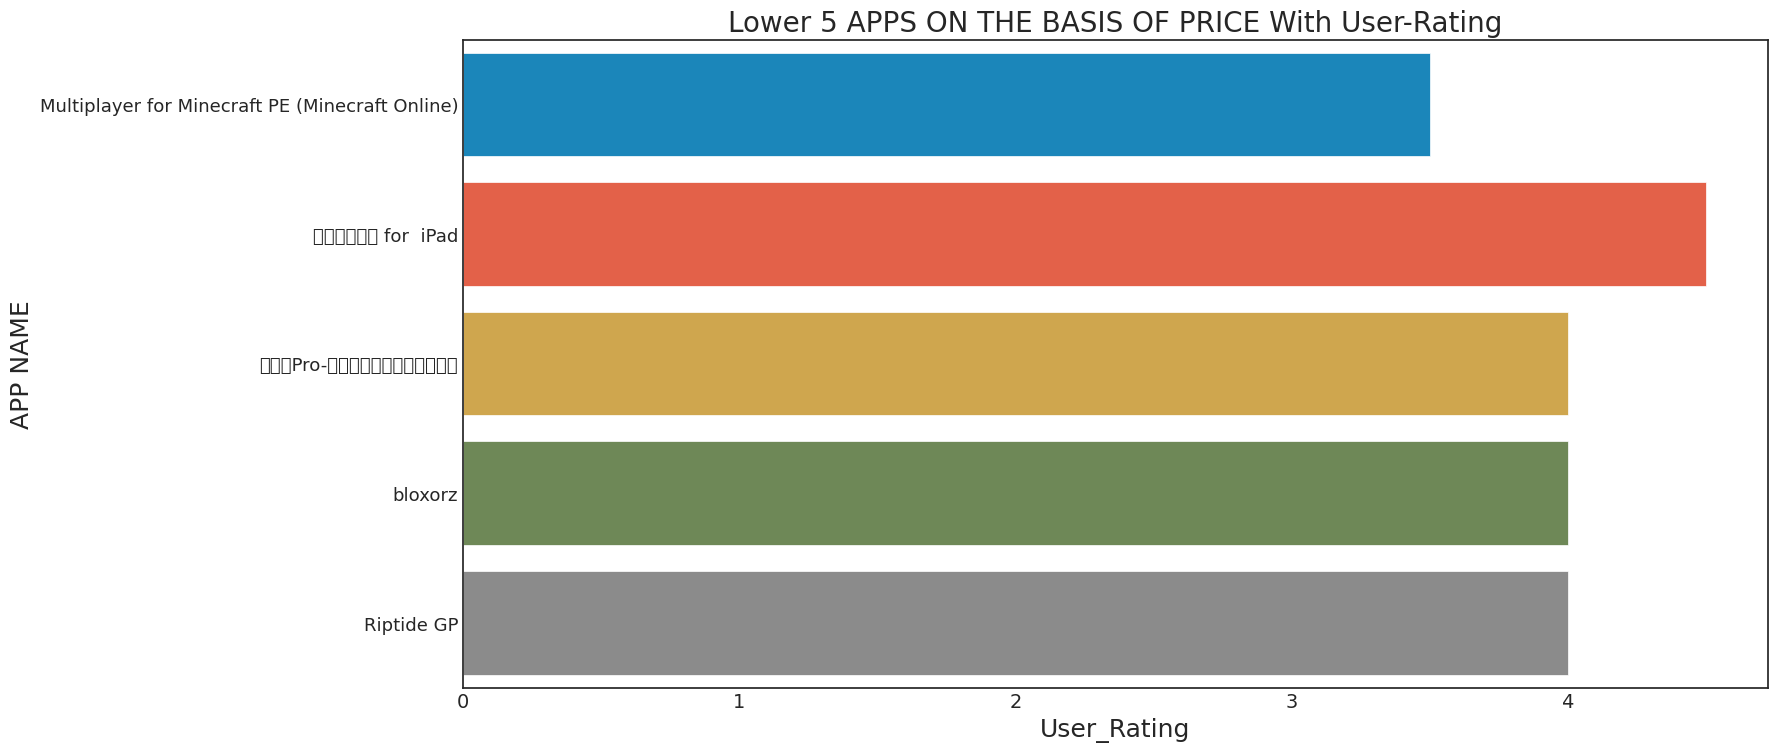

In [48]:
#lower price apps also good rating
Lower_Apps = Lower_Apps.sort_values('price', ascending=True)
lower = Lower_Apps.head()
visualizer(lower.user_rating,lower.track_name, "bar", "Lower 5 APPS ON THE BASIS OF PRICE With User-Rating","User_Rating","APP NAME")

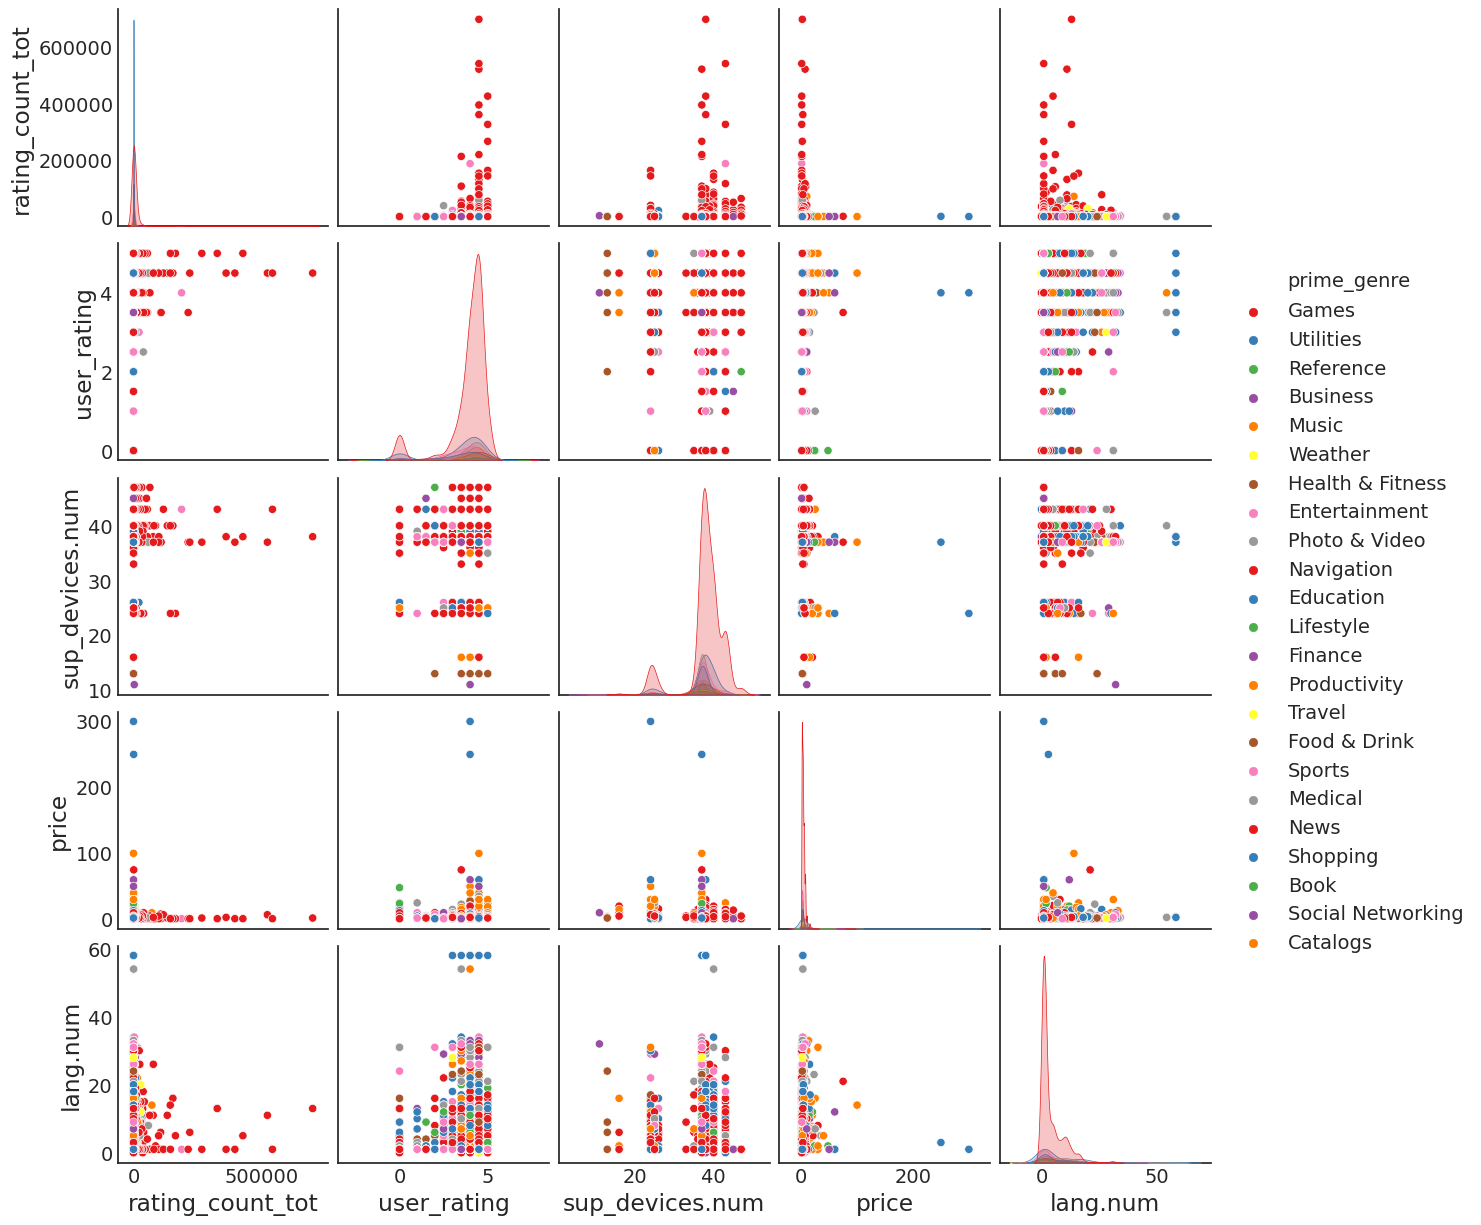

In [49]:
numCol = paid_apps[['rating_count_tot', 'user_rating', 'sup_devices.num', 'price','lang.num', 'prime_genre']]
sns.pairplot(data = numCol, hue='prime_genre',palette='Set1')

(0.0, 4227238656.0)

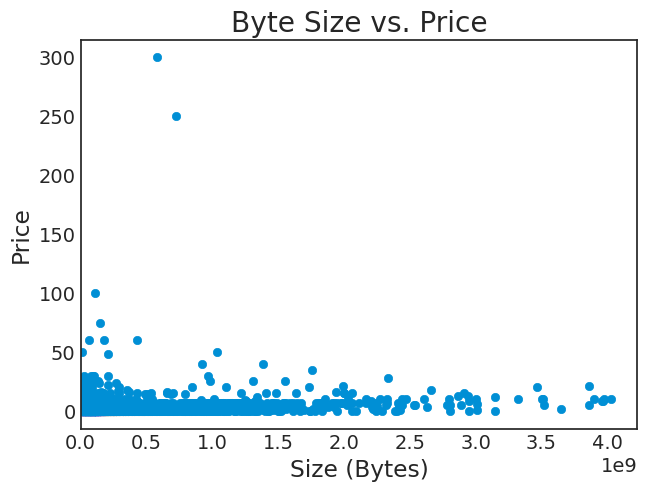

In [50]:
plt.style.use('seaborn-white')
plt.scatter(data['size_bytes'],data['price'])
plt.title('Byte Size vs. Price')
plt.xlabel('Size (Bytes)')
plt.ylabel('Price')
plt.xlim(0)

#size of App not corelated with price
#we show that if size is big ,price is low
#the value of an app to the user isn't necessarily related to its size.

In [51]:
#How are the apps distributed category wise ? Can we split by paid category ?
grp = paid_apps.groupby('prime_genre')
x = grp['user_rating'].agg(np.mean)
y = grp['price'].agg(np.sum)
z = grp['user_rating_ver'].agg(np.mean)
print(x)
print(y)
print(z)

prime_genre
Book                 3.739130
Business             3.878378
Catalogs             4.500000
Education            3.331776
Entertainment        3.410448
Finance              3.325000
Food & Drink         3.500000
Games                3.904984
Health & Fitness     3.788462
Lifestyle            3.210000
Medical              3.633333
Music                4.014085
Navigation           3.057692
News                 3.323529
Photo & Video        3.807692
Productivity         4.030172
Reference            3.522727
Shopping             4.500000
Social Networking    2.916667
Sports               3.128571
Travel               3.380000
Utilities            3.140288
Weather              3.853659
Name: user_rating, dtype: float64
prime_genre
Book                  200.54
Business              291.63
Catalogs                7.99
Education            1824.79
Entertainment         475.99
Finance                43.80
Food & Drink           97.80
Games                5533.95
Health & Fitness    

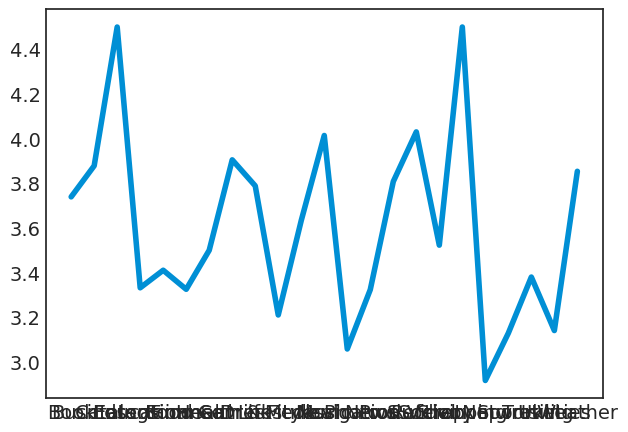

In [52]:
# lets plot
plt.plot(x)

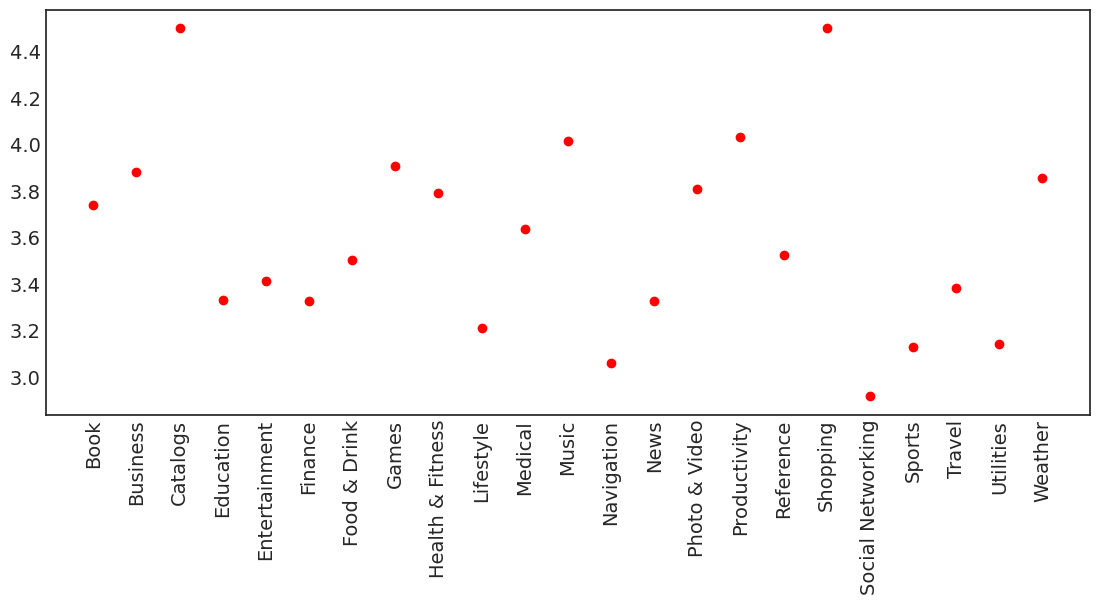

In [53]:
#again need to expand
plt.figure(figsize=(12,5))
plt.plot(x, 'ro')
plt.xticks(rotation=90)
plt.show()

#High Rating with catalogs , shopping
#Low rating in social networking

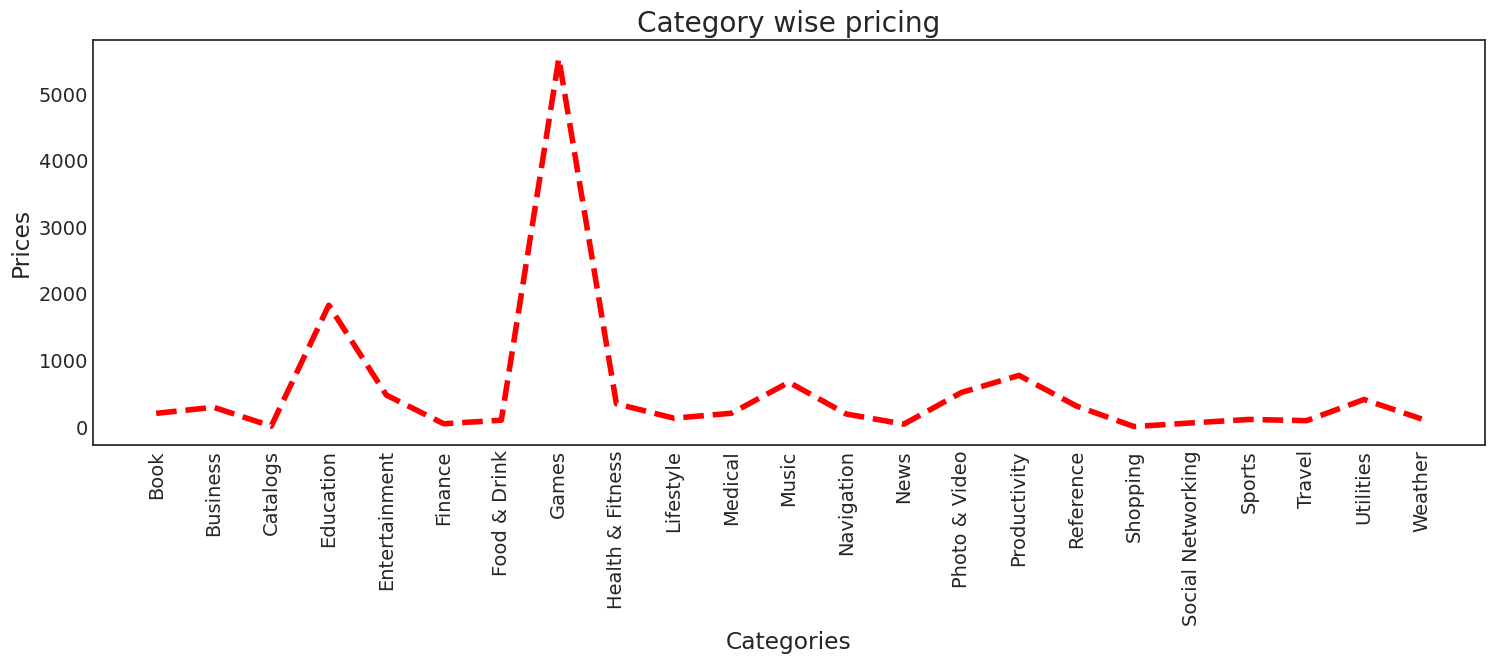

In [54]:
# for Y
plt.figure(figsize=(16,5))
plt.plot(y, 'r--')
plt.xticks(rotation=90)
plt.title('Category wise pricing')
plt.xlabel('Categories')
plt.ylabel('Prices')
plt.show()

In [55]:
# reducing the number of categories to 5 categories

s = data.prime_genre.value_counts().index[:4]
def categ(x):
    if x in s:
        return x
    else : 
        return "Others"

data['broad_genre']= data.prime_genre.apply(lambda x : categ(x))
data['broad_genre'].value_counts()

Games            3862
Others           1998
Entertainment     535
Education         453
Photo & Video     349
Name: broad_genre, dtype: int64

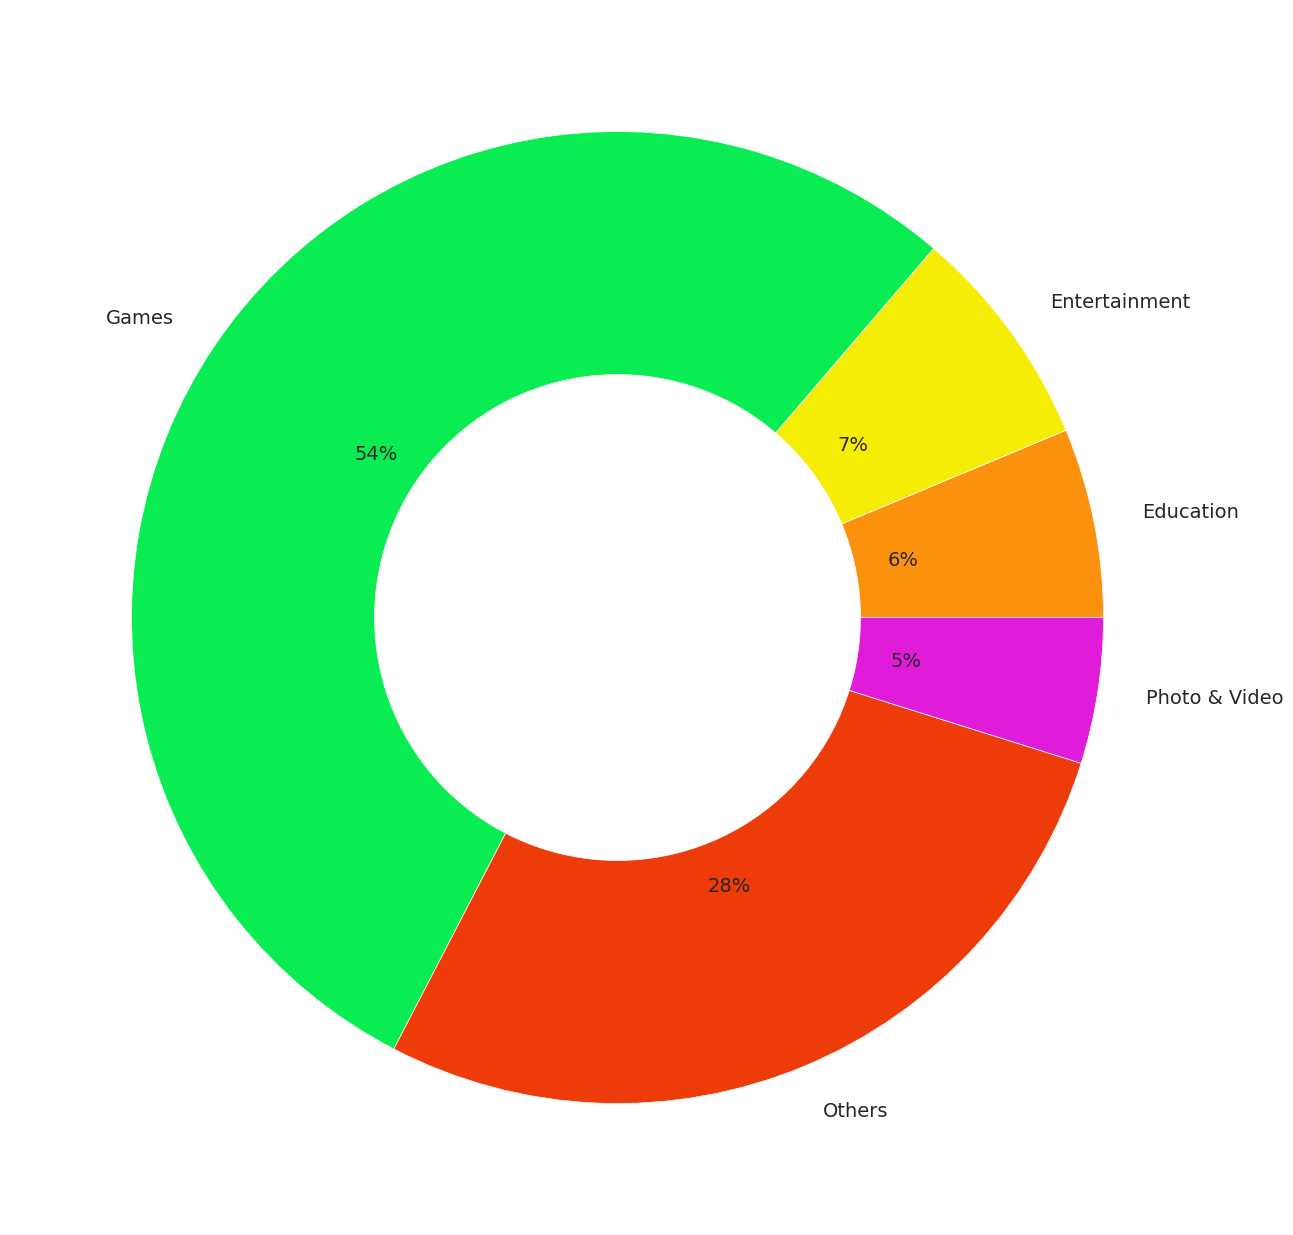

In [56]:
BlueOrangeWapang = ['#fc910d','#f5ed05','#09ed52','#ed3b09','#e01bda']
plt.figure(figsize=(15,15))
label_names=data.broad_genre.value_counts().sort_index().index
size = data.broad_genre.value_counts().sort_index().tolist()

my_circle=plt.Circle( (0,0), 0.5, color='white')
plt.pie(size, labels=label_names, colors=BlueOrangeWapang ,autopct = '%1.0f%%',)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [57]:
free = data[data.price==0].broad_genre.value_counts().sort_index().to_frame()
paid = data[data.price>0].broad_genre.value_counts().sort_index().to_frame()
total = data.broad_genre.value_counts().sort_index().to_frame()
free.columns=['free']
paid.columns=['paid']
total.columns=['total']
five_ca  =free.join(paid).join(total)
five_ca['Paid_per'] = five_ca.paid*100 /five_ca.total
five_ca['Free_per'] = five_ca.free*100/ five_ca.total
five_ca

,free,paid,total,Paid_per,Free_per
Education,132,321,453,70.860927,29.139073
Entertainment,334,201,535,37.570093,62.429907
Games,2257,1605,3862,41.558778,58.441222
Others,1166,832,1998,41.641642,58.358358
Photo & Video,167,182,349,52.148997,47.851003


<Figure size 1500x1500 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

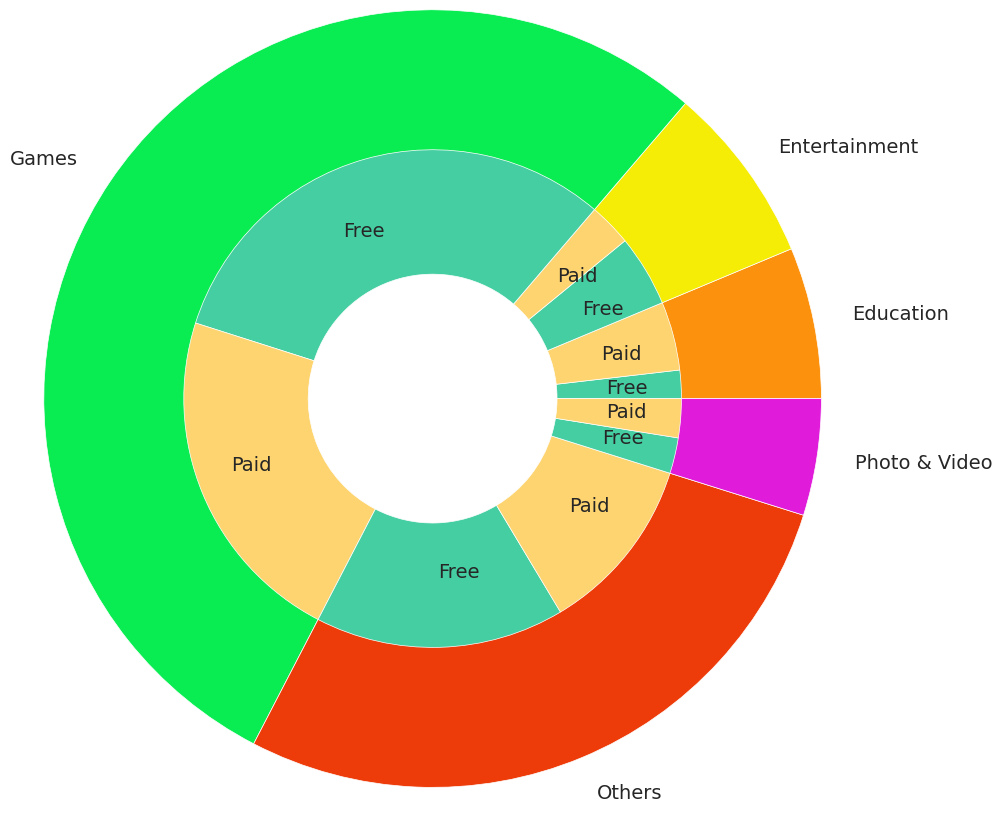

In [58]:
plt.figure(figsize=(15,15))
f=pd.DataFrame(index=np.arange(0,10,2),data=five_ca['free'].values,columns=['num'])
p=pd.DataFrame(index=np.arange(1,11,2),data=five_ca['paid'].values,columns=['num'])
final = pd.concat([f,p],names=['labels']).sort_index()
final.num.tolist()

plt.figure(figsize=(25,25))
group_names=data.broad_genre.value_counts().sort_index().index
group_size=data.broad_genre.value_counts().sort_index().tolist()
h = ['Free', 'Paid']
subgroup_names= 5*h
sub= ['#45cea2','#fdd470']
subcolors= 5*sub
subgroup_size=final.num.tolist()


# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=2.5, labels=group_names, colors=BlueOrangeWapang)
plt.setp( mypie, width=1.2, edgecolor='white')

# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.6, labels=subgroup_names, labeldistance=0.7, colors=subcolors)
plt.setp( mypie2, width=0.8, edgecolor='white')
plt.margins(0,0)

# show it
plt.show()

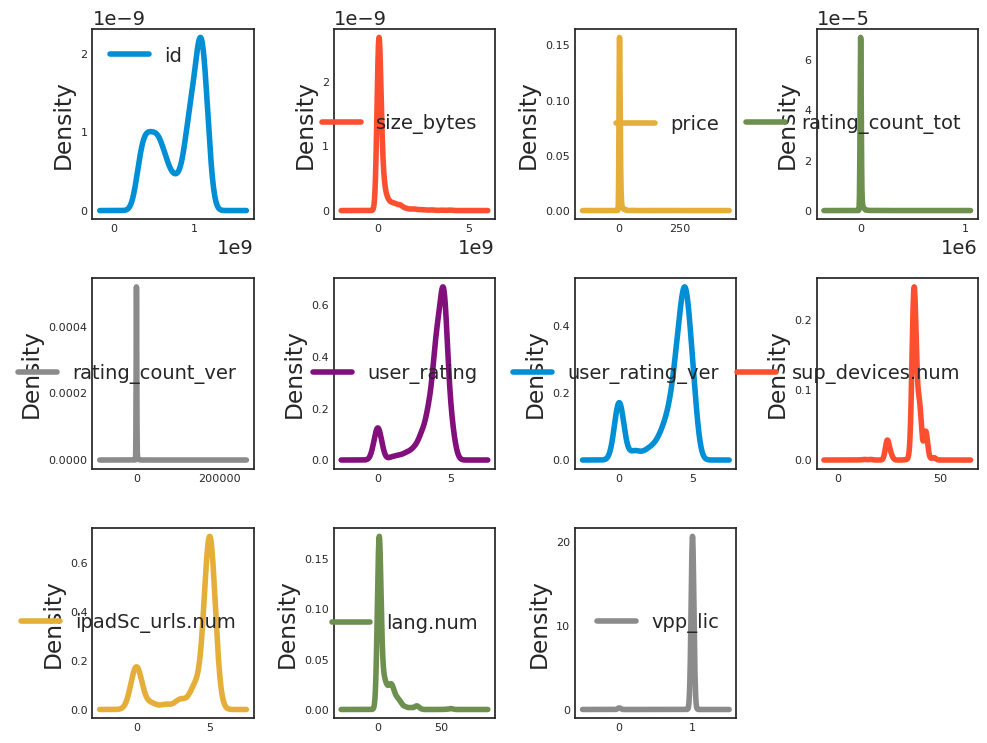

In [59]:
paid_apps.plot(kind='density' , subplots=True , layout=(4,4) , sharex=False ,
          fontsize=8 , figsize=(10,10))
plt.tight_layout()

In [60]:
data.rating_count_tot.value_counts()

0         929
1         120
7          48
9          47
5          46
         ... 
1155        1
7131        1
416736      1
40531       1
1441        1
Name: rating_count_tot, Length: 3185, dtype: int64

In [61]:
free_apps.vpp_lic.value_counts()

1    4035
0      21
Name: vpp_lic, dtype: int64

In [62]:
paid_apps.vpp_lic.value_counts()

1    3112
0      29
Name: vpp_lic, dtype: int64

In [63]:
data.vpp_lic.value_counts()

1    7147
0      50
Name: vpp_lic, dtype: int64

<Axes: xlabel='lang.num', ylabel='Count'>

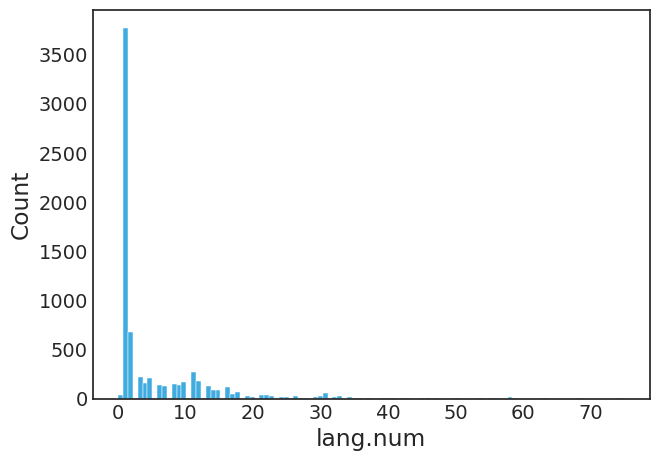

In [64]:
sns.histplot(data['lang.num'])

In [65]:
from sklearn.preprocessing import LabelEncoder
USD_LABEL =  LabelEncoder()
data['currency']= USD_LABEL.fit_transform(data['currency'])
data.drop(['broad_genre'] ,
          #['currency'],
          axis = 1, inplace = True)
data.drop(['currency'],
          axis = 1, inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                7197 non-null   int64  
 1   track_name        7197 non-null   object 
 2   size_bytes        7197 non-null   int64  
 3   price             7197 non-null   float64
 4   rating_count_tot  7197 non-null   int64  
 5   rating_count_ver  7197 non-null   int64  
 6   user_rating       7197 non-null   float64
 7   user_rating_ver   7197 non-null   float64
 8   ver               7197 non-null   object 
 9   cont_rating       7197 non-null   object 
 10  prime_genre       7197 non-null   object 
 11  sup_devices.num   7197 non-null   int64  
 12  ipadSc_urls.num   7197 non-null   int64  
 13  lang.num          7197 non-null   int64  
 14  vpp_lic           7197 non-null   int64  
dtypes: float64(3), int64(8), object(4)
memory usage: 843.5+ KB


In [66]:
#encoding object columns int
track_name_LABEL =  LabelEncoder()
data['track_name']= track_name_LABEL.fit_transform(data['track_name'])
ver_LABEL =  LabelEncoder()
data['ver']= ver_LABEL.fit_transform(data['ver'])

prime_genre_LABEL =  LabelEncoder()
data['prime_genre']= prime_genre_LABEL.fit_transform(data['prime_genre'])


cont_rating_LABEL =  LabelEncoder()
data['cont_rating']= cont_rating_LABEL.fit_transform(data['cont_rating'])
data.head()

,id,track_name,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,281656475,3676,100788224,3.99,21292,26,4.0,4.5,1379,2,7,38,5,10,1
1,281796108,1664,158578688,0.00,161065,26,4.0,3.5,1514,2,15,37,5,23,1
2,281940292,5870,100524032,0.00,188583,2822,3.5,4.5,1210,2,22,37,5,3,1
3,282614216,6132,128512000,0.00,262241,649,4.0,4.5,1236,0,17,37,5,9,1
4,282935706,527,92774400,0.00,985920,5320,4.5,5.0,1472,2,16,37,5,45,1


In [67]:
data.drop(['id'] , axis =1 , inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_name        7197 non-null   int64  
 1   size_bytes        7197 non-null   int64  
 2   price             7197 non-null   float64
 3   rating_count_tot  7197 non-null   int64  
 4   rating_count_ver  7197 non-null   int64  
 5   user_rating       7197 non-null   float64
 6   user_rating_ver   7197 non-null   float64
 7   ver               7197 non-null   int64  
 8   cont_rating       7197 non-null   int64  
 9   prime_genre       7197 non-null   int64  
 10  sup_devices.num   7197 non-null   int64  
 11  ipadSc_urls.num   7197 non-null   int64  
 12  lang.num          7197 non-null   int64  
 13  vpp_lic           7197 non-null   int64  
dtypes: float64(3), int64(11)
memory usage: 787.3 KB


In [68]:
#Data about Data
data.describe().style.background_gradient(cmap='Purples')

,track_name,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
count,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000
mean,3597.221203,199134453.825066,1.726218,12892.907184,460.373906,3.526956,3.253578,525.092539,1.729749,8.580937,37.361817,3.707100,5.434903,0.993053
std,2077.028362,359206913.538703,5.833006,75739.408675,3920.455183,1.517948,1.809363,433.974761,0.890266,4.865651,3.737715,1.986005,7.919593,0.083066
min,0.000000,589824.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000
25%,1799.000000,46922752.000000,0.000000,28.000000,1.000000,3.500000,2.500000,118.000000,2.000000,7.000000,37.000000,3.000000,1.000000,1.000000
50%,3597.000000,97153024.000000,0.000000,300.000000,23.000000,4.000000,4.000000,390.000000,2.000000,7.000000,37.000000,5.000000,1.000000,1.000000
75%,5396.000000,181924864.000000,1.990000,2793.000000,140.000000,4.500000,4.500000,848.000000,2.000000,9.000000,38.000000,5.000000,8.000000,1.000000
max,7194.000000,4025969664.000000,299.990000,2974676.000000,177050.000000,5.000000,5.000000,1589.000000,3.000000,22.000000,47.000000,5.000000,75.000000,1.000000


In [81]:
#Calculating ppscore 
import ppscore
c=pps.matrix(data)
c

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,track_name,track_name,1.0,predict_itself,True,None,0.000000e+00,1.000000e+00,None
1,track_name,size_bytes,0.0,regression,True,mean absolute error,1.507944e+08,2.034129e+08,DecisionTreeRegressor()
2,track_name,price,0.0,regression,True,mean absolute error,1.771204e+00,2.240976e+00,DecisionTreeRegressor()
3,track_name,rating_count_tot,0.0,regression,True,mean absolute error,1.216113e+04,2.047588e+04,DecisionTreeRegressor()
4,track_name,rating_count_ver,0.0,regression,True,mean absolute error,4.637924e+02,7.655062e+02,DecisionTreeRegressor()
...,...,...,...,...,...,...,...,...,...
191,vpp_lic,prime_genre,0.0,regression,True,mean absolute error,2.912000e+00,3.623269e+00,DecisionTreeRegressor()
192,vpp_lic,sup_devices.num,0.0,regression,True,mean absolute error,1.827400e+00,1.836597e+00,DecisionTreeRegressor()
193,vpp_lic,ipadSc_urls.num,0.0,regression,True,mean absolute error,1.280600e+00,1.656586e+00,DecisionTreeRegressor()
194,vpp_lic,lang.num,0.0,regression,True,mean absolute error,4.398600e+00,5.489964e+00,DecisionTreeRegressor()


<Axes: xlabel='x', ylabel='y'>

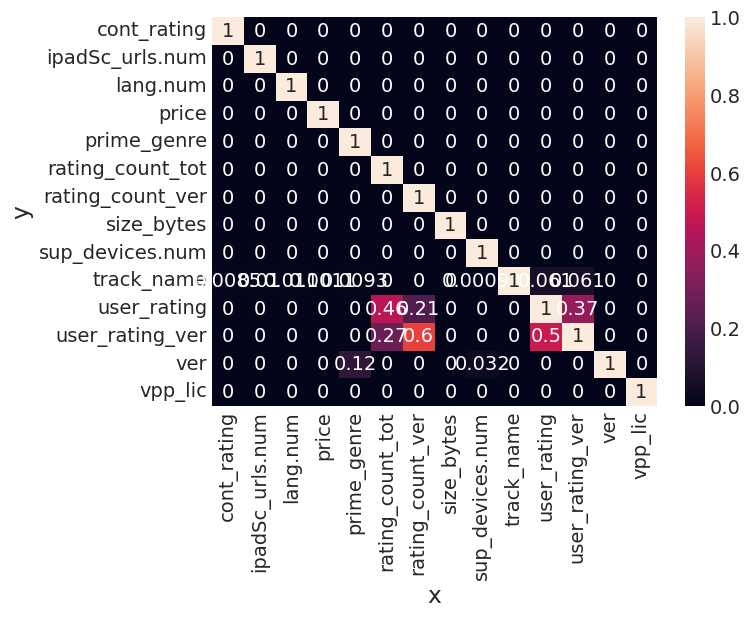

In [82]:
figsize=(20,20)
a = pps.matrix(data).pivot(columns='x', index='y', values='ppscore')
sns.heatmap(a, annot=True) 

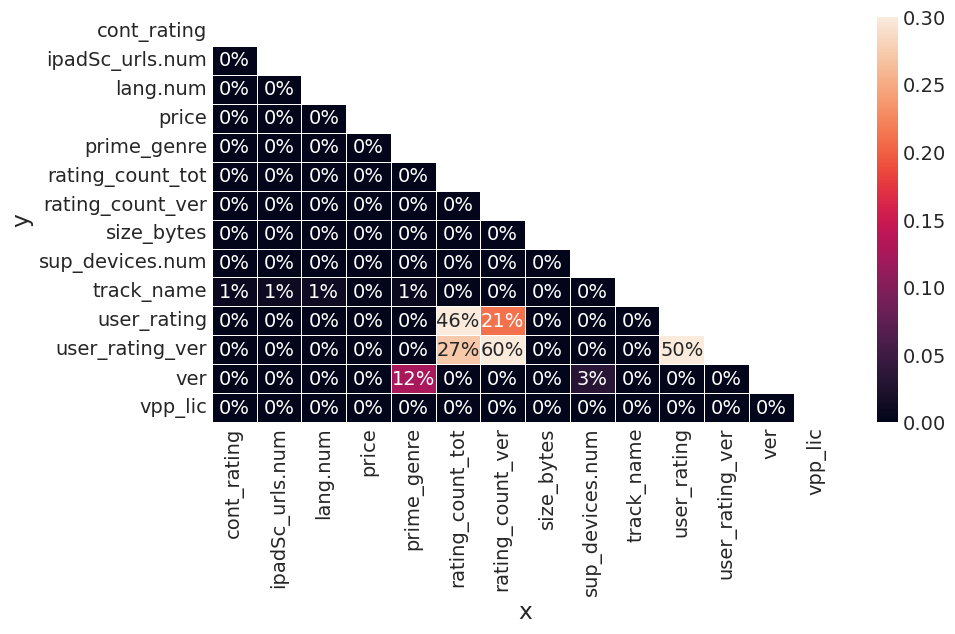

In [83]:
mask = np.zeros_like(a)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("ticks"):
    f, ax = plt.subplots(figsize=(9, 5))
    ax = sns.heatmap(a, mask=mask, vmax=.3,annot=True,fmt=".0%",linewidth=0.5,square=False)

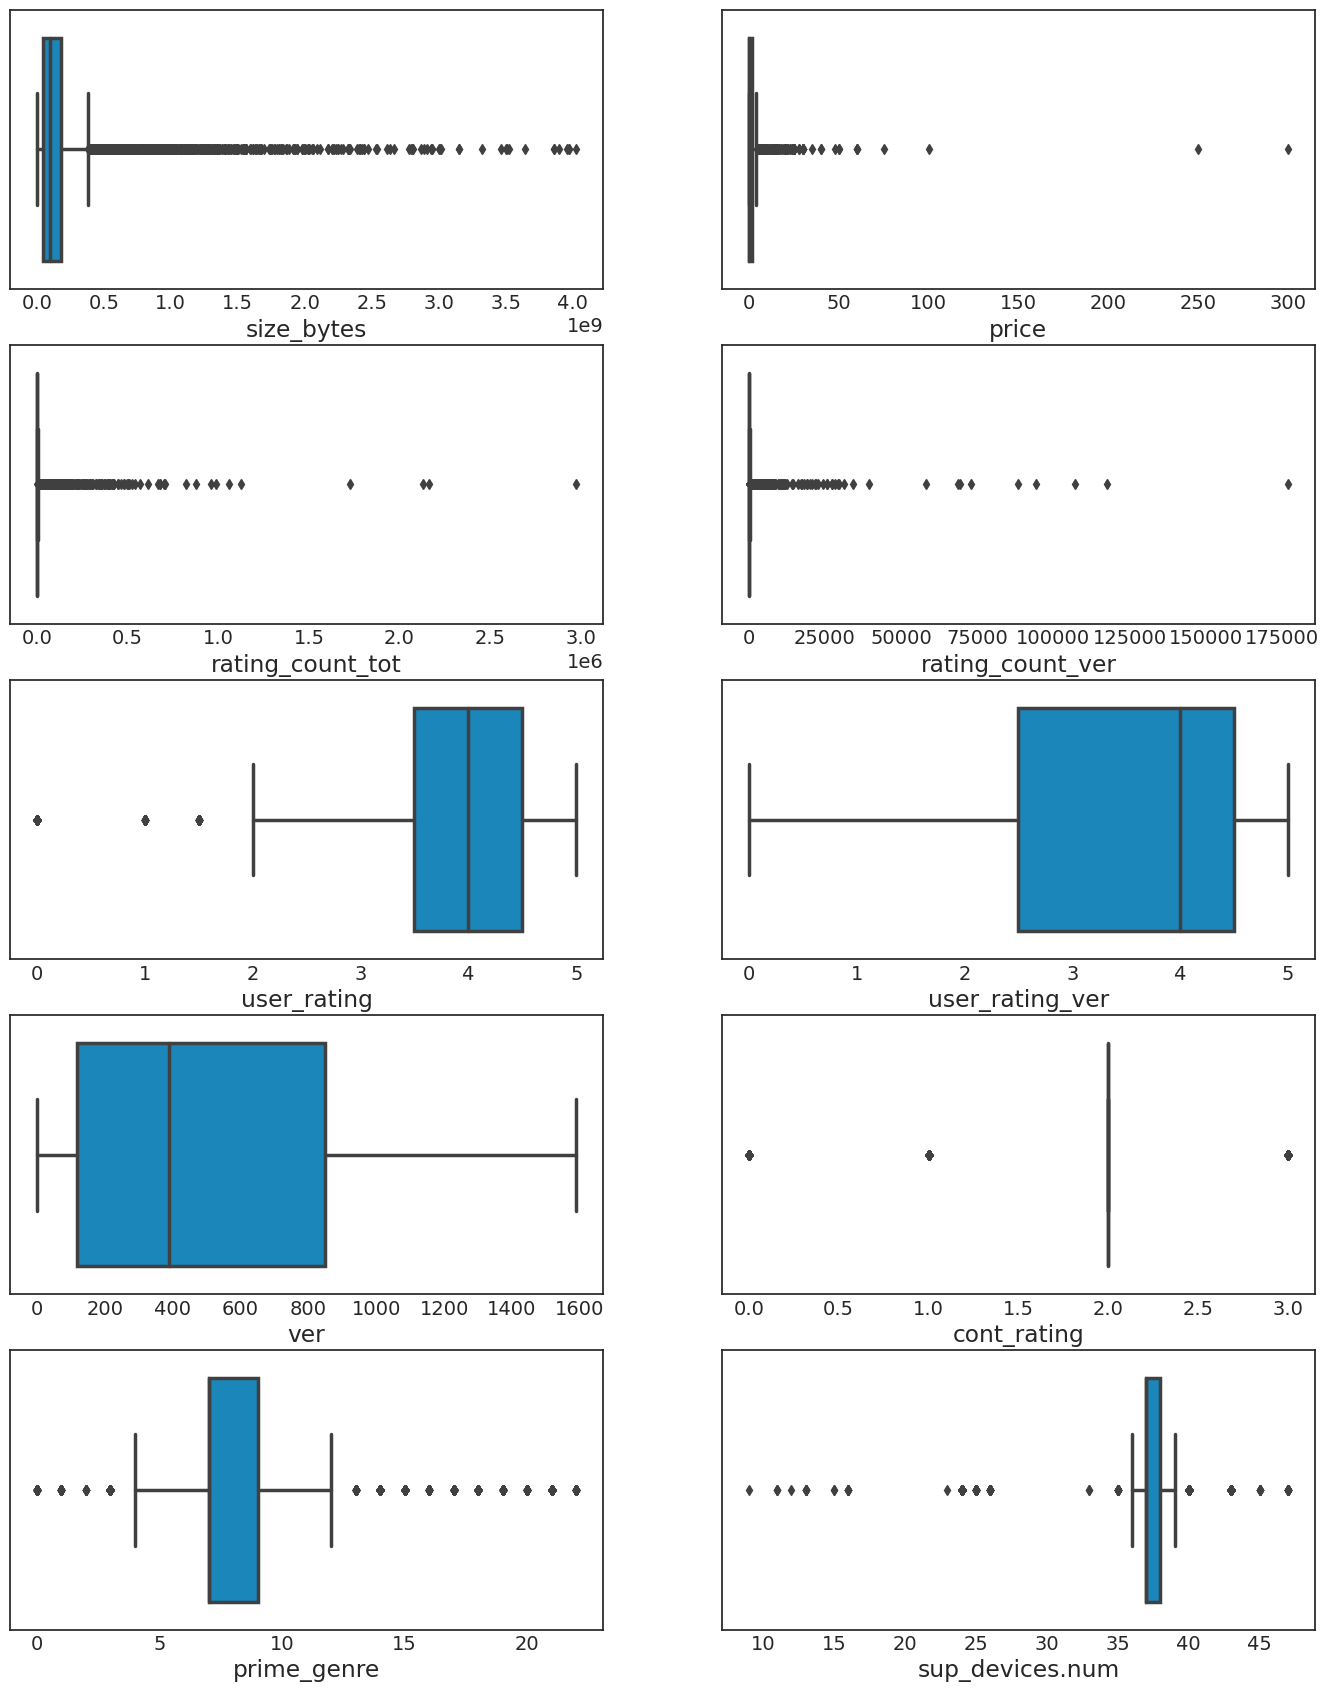

In [84]:
#Show outliers with boxplot
plt.figure(figsize = (15,20))
col_names = [ 'size_bytes', 'price', 'rating_count_tot',
       'rating_count_ver', 'user_rating', 'user_rating_ver', 'ver',
       'cont_rating', 'prime_genre', 'sup_devices.num']
for i in range(10):
    plt.subplot(5,2,i+1)#3 number of row #2 number of columns
    sns.boxplot(x=data[col_names[i]], linewidth=2.5)
plt.show()

In [85]:
 outliers_list = []
# For each feature find the data points with extreme high or low values
for feature in data.keys():
    
    # Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(data[feature], 25)
    
    # Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(data[feature], 75)
    
    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3 - Q1) * 1.5
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    outliers = list(data[~((data[feature] >= Q1 - step) & (data[feature] <= Q3 + step))].index.values)
    
    display(data[~((data[feature] >= Q1 - step) & (data[feature] <= Q3 + step))])
    print('-=-=-=-=-=-=-=-=-=-=-=-=-------------------------------=-=-=-=-=-=-=-=-=-=-=-=')
    outliers_list.extend(outliers)
    
#print("List of Outliers -> \n :{}".format(outliers_list))

Data points considered outliers for the feature 'track_name':


,track_name,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic


-=-=-=-=-=-=-=-=-=-=-=-=-------------------------------=-=-=-=-=-=-=-=-=-=-=-=
Data points considered outliers for the feature 'size_bytes':


,track_name,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
16,1743,389879808,0.00,2974676,212,3.5,3.5,1577,2,18,37,1,29,1
103,4440,431771648,2.99,35074,403,4.5,4.0,962,2,7,43,0,6,1
115,4054,723764224,249.99,773,10,4.0,3.5,1211,2,3,37,5,3,1
152,5327,430128128,6.99,54408,65,3.5,2.0,350,0,7,37,5,8,1
281,2232,878883840,4.99,15142,73,4.0,4.0,1152,1,7,38,5,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7076,2342,479346688,0.00,60,10,4.5,3.5,609,0,7,40,5,1,1
7133,6103,3148421120,0.00,0,0,0.0,0.0,31,0,7,40,0,1,0
7162,2606,628180992,2.99,26,0,4.5,0.0,254,3,7,37,5,1,1
7164,7192,3503480832,9.99,0,0,0.0,0.0,45,0,7,40,0,1,0


-=-=-=-=-=-=-=-=-=-=-=-=-------------------------------=-=-=-=-=-=-=-=-=-=-=-=
Data points considered outliers for the feature 'price':


,track_name,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
8,3688,49250304,9.99,1117,4,4.5,5.0,1008,2,21,37,5,1,1
10,4768,49618944,4.99,76720,4017,4.5,4.5,1096,2,7,38,4,11,1
11,4372,227547136,7.99,105776,166,3.5,2.5,1247,2,7,37,0,6,1
14,2031,55153664,4.99,6340,668,4.5,4.5,1065,2,7,38,5,2,1
23,3191,71203840,5.99,8,0,4.5,0.0,1541,2,1,37,5,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7042,6506,196380672,4.99,1,1,3.0,3.0,92,2,7,38,5,1,1
7073,6464,51174400,12.99,0,0,0.0,0.0,31,2,3,37,5,1,1
7105,796,94401536,9.99,39,7,2.5,2.5,430,2,1,37,0,7,1
7164,7192,3503480832,9.99,0,0,0.0,0.0,45,0,7,40,0,1,0


-=-=-=-=-=-=-=-=-=-=-=-=-------------------------------=-=-=-=-=-=-=-=-=-=-=-=
Data points considered outliers for the feature 'rating_count_tot':


,track_name,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,3676,100788224,3.99,21292,26,4.0,4.5,1379,2,7,38,5,10,1
1,1664,158578688,0.00,161065,26,4.0,3.5,1514,2,15,37,5,23,1
2,5870,100524032,0.00,188583,2822,3.5,4.5,1210,2,22,37,5,3,1
3,6132,128512000,0.00,262241,649,4.0,4.5,1236,0,17,37,5,9,1
4,527,92774400,0.00,985920,5320,4.5,5.0,1472,2,16,37,5,45,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6897,1971,35136512,0.00,13914,493,4.5,4.0,725,2,18,37,0,8,1
6914,1944,143591424,0.00,42435,2957,4.5,4.5,430,2,7,40,5,1,1
6935,3228,187168768,0.00,11602,191,4.5,4.5,148,0,7,38,5,9,1
6969,4391,137533440,0.00,25859,839,5.0,4.5,162,0,7,37,5,1,1


-=-=-=-=-=-=-=-=-=-=-=-=-------------------------------=-=-=-=-=-=-=-=-=-=-=-=
Data points considered outliers for the feature 'rating_count_ver':


,track_name,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
2,5870,100524032,0.00,188583,2822,3.5,4.5,1210,2,22,37,5,3,1
3,6132,128512000,0.00,262241,649,4.0,4.5,1236,0,17,37,5,9,1
4,527,92774400,0.00,985920,5320,4.5,5.0,1472,2,16,37,5,45,1
5,4528,10485713,0.99,8253,5516,4.0,4.0,454,2,7,47,5,1,1
6,3784,227795968,0.00,119487,879,4.0,4.5,1359,2,5,37,0,19,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7044,2661,34719744,0.00,2772,2495,3.5,3.5,345,2,7,37,3,1,1
7068,3759,281393152,0.00,24097,4469,4.0,4.5,815,2,7,37,4,1,1
7125,4932,323822592,0.00,1362,1142,5.0,5.0,31,2,7,38,5,1,1
7129,648,124506112,0.00,3384,3124,4.5,4.5,118,2,7,40,5,1,1


-=-=-=-=-=-=-=-=-=-=-=-=-------------------------------=-=-=-=-=-=-=-=-=-=-=-=
Data points considered outliers for the feature 'user_rating':


,track_name,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
199,6172,3375104,3.99,0,0,0.0,0.0,1227,2,5,37,5,3,1
301,6133,8039424,3.99,0,0,0.0,0.0,1435,3,0,37,5,1,1
330,2653,147066880,7.99,0,0,0.0,0.0,815,2,20,40,5,1,1
402,1761,7689537,0.00,354,215,1.5,1.0,91,2,18,43,0,1,1
441,6782,41207059,0.00,0,0,0.0,0.0,648,2,12,39,5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7181,6621,178160640,0.99,0,0,0.0,0.0,29,3,7,40,5,0,1
7182,6120,9362432,0.00,0,0,0.0,0.0,62,2,14,37,0,1,1
7184,6622,171944960,0.00,0,0,0.0,0.0,29,3,7,40,5,0,1
7185,7137,208026624,0.99,0,0,0.0,0.0,29,3,7,38,5,1,1


-=-=-=-=-=-=-=-=-=-=-=-=-------------------------------=-=-=-=-=-=-=-=-=-=-=-=
Data points considered outliers for the feature 'user_rating_ver':


,track_name,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic


-=-=-=-=-=-=-=-=-=-=-=-=-------------------------------=-=-=-=-=-=-=-=-=-=-=-=
Data points considered outliers for the feature 'ver':


,track_name,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic


-=-=-=-=-=-=-=-=-=-=-=-=-------------------------------=-=-=-=-=-=-=-=-=-=-=-=
Data points considered outliers for the feature 'cont_rating':


,track_name,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
3,6132,128512000,0.00,262241,649,4.0,4.5,1236,0,17,37,5,9,1
7,3740,130242560,0.00,1126879,3594,4.0,4.5,1522,0,11,37,4,1,1
12,2226,179979264,0.00,479440,203,3.5,4.0,858,1,21,37,4,33,1
17,6030,167407616,0.00,223885,3726,4.0,4.5,550,0,20,37,5,18,1
18,4531,147093504,0.00,402925,136,4.0,4.5,548,0,11,37,3,16,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7188,1280,168774656,0.00,18,18,4.0,4.0,30,0,7,38,4,1,1
7189,7163,537462784,0.99,0,0,0.0,0.0,648,3,7,38,5,1,1
7191,3939,27853824,2.99,11,0,4.0,0.0,118,1,7,37,0,1,1
7194,674,111322112,1.99,15,0,4.5,0.0,45,3,21,37,1,1,1


-=-=-=-=-=-=-=-=-=-=-=-=-------------------------------=-=-=-=-=-=-=-=-=-=-=-=
Data points considered outliers for the feature 'prime_genre':


,track_name,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
1,1664,158578688,0.00,161065,26,4.0,3.5,1514,2,15,37,5,23,1
2,5870,100524032,0.00,188583,2822,3.5,4.5,1210,2,22,37,5,3,1
3,6132,128512000,0.00,262241,649,4.0,4.5,1236,0,17,37,5,9,1
4,527,92774400,0.00,985920,5320,4.5,5.0,1472,2,16,37,5,45,1
8,3688,49250304,9.99,1117,4,4.5,5.0,1008,2,21,37,5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7173,3356,18164736,0.99,0,0,0.0,0.0,114,2,21,37,0,1,1
7179,1766,113382400,0.00,279,5,3.5,3.0,14,2,18,37,4,1,1
7180,2846,94008320,0.00,26,3,5.0,5.0,70,3,21,37,4,1,1
7182,6120,9362432,0.00,0,0,0.0,0.0,62,2,14,37,0,1,1


-=-=-=-=-=-=-=-=-=-=-=-=-------------------------------=-=-=-=-=-=-=-=-=-=-=-=
Data points considered outliers for the feature 'sup_devices.num':


,track_name,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
5,4528,10485713,0.99,8253,5516,4.0,4.0,454,2,7,47,5,1,1
19,1104,10735026,2.99,31456,4178,4.0,3.5,30,2,7,47,0,1,1
20,6181,70707916,1.99,2929,966,4.5,4.5,961,2,16,43,0,2,1
21,82,6169600,2.99,11447,781,5.0,5.0,1257,2,7,40,5,1,1
24,980,11423008,3.99,3241,297,4.0,4.0,656,2,11,43,2,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7176,2477,184324096,0.00,0,0,0.0,0.0,31,2,7,40,4,1,1
7181,6621,178160640,0.99,0,0,0.0,0.0,29,3,7,40,5,0,1
7183,5039,57349120,3.99,292,292,4.0,4.0,621,3,7,40,5,1,1
7184,6622,171944960,0.00,0,0,0.0,0.0,29,3,7,40,5,0,1


-=-=-=-=-=-=-=-=-=-=-=-=-------------------------------=-=-=-=-=-=-=-=-=-=-=-=
Data points considered outliers for the feature 'ipadSc_urls.num':


,track_name,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic


-=-=-=-=-=-=-=-=-=-=-=-=-------------------------------=-=-=-=-=-=-=-=-=-=-=-=
Data points considered outliers for the feature 'lang.num':


,track_name,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
1,1664,158578688,0.00,161065,26,4.0,3.5,1514,2,15,37,5,23,1
4,527,92774400,0.00,985920,5320,4.5,5.0,1472,2,16,37,5,45,1
6,3784,227795968,0.00,119487,879,4.0,4.5,1359,2,5,37,0,19,1
12,2226,179979264,0.00,479440,203,3.5,4.0,858,1,21,37,4,33,1
15,5555,207907840,0.00,56194,87,4.0,3.5,849,2,20,37,1,26,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7109,4758,55877632,0.00,103,1,4.0,5.0,1348,0,19,37,4,26,1
7112,2355,45356032,1.99,28,5,3.5,4.0,126,2,8,13,0,24,1
7148,934,62359552,0.00,96,96,4.5,4.5,29,2,7,40,3,25,1
7169,5120,32685056,2.99,9,3,3.0,3.5,31,2,4,37,0,31,1


-=-=-=-=-=-=-=-=-=-=-=-=-------------------------------=-=-=-=-=-=-=-=-=-=-=-=
Data points considered outliers for the feature 'vpp_lic':


,track_name,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
42,6193,44241920,3.99,30,0,3.5,0.0,829,2,12,37,0,2,0
48,1718,72748032,0.00,57500,103,3.0,4.0,990,2,19,37,0,1,0
74,100,98108416,0.00,48407,20,3.0,3.5,1245,0,13,37,0,1,0
122,4930,17010688,0.99,53821,165,3.5,4.0,468,0,7,43,1,1,0
180,3698,64147456,0.00,10472,58,3.5,2.0,1505,1,19,37,5,1,0
181,380,100779008,0.00,115,70,4.0,5.0,1218,1,13,37,4,1,0
311,4538,7344128,1.99,348,33,4.0,4.0,390,2,15,40,0,1,0
334,2736,151864320,0.00,260965,228,4.0,3.0,553,0,18,37,0,14,0
366,102,85724160,0.00,78890,449,3.0,3.5,1213,0,4,37,5,1,0
391,2006,64705536,0.00,132703,394,4.0,3.0,783,2,13,37,5,1,0


-=-=-=-=-=-=-=-=-=-=-=-=-------------------------------=-=-=-=-=-=-=-=-=-=-=-=


In [69]:
#Before clustering, we transform features from original version to standardize version
#Creat Object from RobustScaler
s = RobustScaler()
#fit_transform for dataset
data_robustscaler = s.fit_transform(data)
df_robust = pd.DataFrame(data_robustscaler , columns=['track_name', 'size_bytes', 'price', 'rating_count_tot',
       'rating_count_ver', 'user_rating', 'user_rating_ver', 'ver',
       'cont_rating', 'prime_genre', 'sup_devices.num', 'ipadSc_urls.num',
       'lang.num', 'vpp_lic'])
df_robust.head()

,track_name,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,0.021963,0.026927,2.005025,7.592043,0.021583,0.0,0.25,1.354795,0.0,0.0,1.0,0.0,1.285714,0.0
1,-0.537392,0.454998,0.000000,58.142857,0.021583,0.0,-0.25,1.539726,0.0,4.0,0.0,0.0,3.142857,0.0
2,0.631915,0.024970,0.000000,68.095118,20.136691,-0.5,0.25,1.123288,0.0,7.5,0.0,0.0,0.285714,0.0
3,0.704754,0.232285,0.000000,94.734539,4.503597,0.0,0.25,1.158904,-2.0,5.0,0.0,0.0,1.142857,0.0
4,-0.853489,-0.032434,0.000000,356.462929,38.107914,0.5,0.50,1.482192,0.0,4.5,0.0,0.0,6.285714,0.0


In [70]:
data.columns

Index(['track_name', 'size_bytes', 'price', 'rating_count_tot',
       'rating_count_ver', 'user_rating', 'user_rating_ver', 'ver',
       'cont_rating', 'prime_genre', 'sup_devices.num', 'ipadSc_urls.num',
       'lang.num', 'vpp_lic'],
      dtype='object')

In [71]:
df_robust = pd.DataFrame(data_robustscaler , columns=['track_name', 'size_bytes', 'price', 'rating_count_tot',
       'rating_count_ver', 'user_rating', 'user_rating_ver', 'ver',
       'cont_rating', 'prime_genre', 'sup_devices.num', 'ipadSc_urls.num',
       'lang.num', 'vpp_lic'])
df_robust.head()

,track_name,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,0.021963,0.026927,2.005025,7.592043,0.021583,0.0,0.25,1.354795,0.0,0.0,1.0,0.0,1.285714,0.0
1,-0.537392,0.454998,0.000000,58.142857,0.021583,0.0,-0.25,1.539726,0.0,4.0,0.0,0.0,3.142857,0.0
2,0.631915,0.024970,0.000000,68.095118,20.136691,-0.5,0.25,1.123288,0.0,7.5,0.0,0.0,0.285714,0.0
3,0.704754,0.232285,0.000000,94.734539,4.503597,0.0,0.25,1.158904,-2.0,5.0,0.0,0.0,1.142857,0.0
4,-0.853489,-0.032434,0.000000,356.462929,38.107914,0.5,0.50,1.482192,0.0,4.5,0.0,0.0,6.285714,0.0


In [72]:
ilist = [] #list of inertias #sum of distance between data point and center of cluster
n=15 #number of clusters 
for i in range (1,n):
    KMeanModel = KMeans(n_clusters=i , init='k-means++' , random_state=25 , algorithm='auto')
    KMeanModel.fit(df_robust)#Fitting Model
    ilist.append(KMeanModel.inertia_)
    
ilist

[11429215.571860183,
 7211367.732265173,
 4350808.286789402,
 2837358.064677667,
 2174410.5194791714,
 1764759.8616439071,
 1374439.6899419762,
 1152193.8861806311,
 1004573.4767642608,
 880270.8073517169,
 819096.2145871606,
 733750.6534324781,
 661289.890425964,
 601844.1517919985]

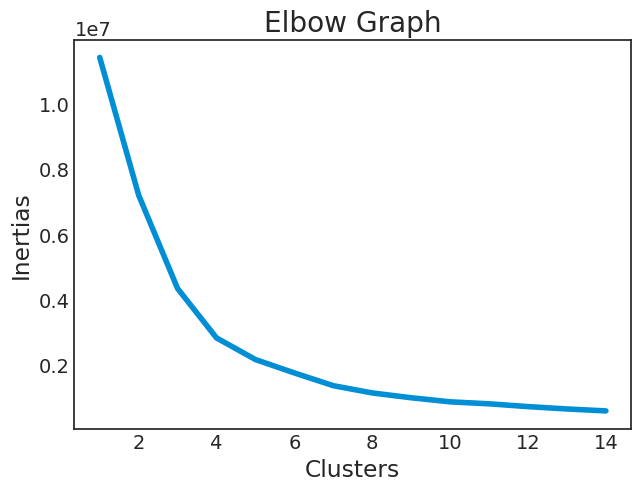

In [73]:
plt.plot(range(1,n) , ilist)
plt.title('Elbow Graph')
plt.xlabel('Clusters')
plt.ylabel('Inertias')
plt.show()

In [74]:
KMeanModel = KMeans(n_clusters= 7, init='k-means++' , random_state=33 , algorithm='auto')
#algorithm is auto , full or elkan
#Fitting Model
KMeanModel.fit(df_robust)
y_predict=KMeanModel.predict(df_robust)
centers = KMeanModel.cluster_centers_
labels  = KMeanModel.labels_
inertial= KMeanModel.inertia_
iteration=KMeanModel.n_iter_  

In [75]:
silhouette_Score = silhouette_score(df_robust , labels)
print('Silutescore Score for KMean :: ',silhouette_Score)

Silutescore Score for KMean ::  0.8396241892059226


In [76]:
print('\n Centers of 3 clusters :: \n' , centers)
print('\n Labels is :: \n',labels)
print('\n Y_Predictions :: \n' , y_predict)
print('\n Inertial is :: ',inertial)
print('\n Iteration is :: ',iteration)


 Centers of 3 clusters :: 
 [[ 3.63350681e-03  7.51607033e-01  8.92174357e-01  1.44515669e+00
   1.37572656e+00 -4.99568718e-01 -3.90921507e-01  1.70131433e-01
  -2.65526164e-01  7.74942496e-01  3.46032202e-01 -6.52458309e-01
   6.09586790e-01 -6.90051754e-03]
 [-2.67493443e-01  1.13559362e+00  1.96198383e-01  2.40553141e+02
   1.85442602e+01  3.04347826e-01  1.63043478e-01  8.74865992e-01
  -3.04347826e-01  1.54347826e+00  1.13043478e+00 -3.91304348e-01
   2.27329193e+00 -8.67361738e-19]
 [ 6.01195441e-02 -4.64170951e-02  6.21859296e-02  8.16063743e+01
   6.08585432e+02  3.12500000e-01  1.56250000e-01  4.26369863e-02
  -3.75000000e-01  1.43750000e+00  7.50000000e-01 -7.50000000e-01
   6.25000000e-01  0.00000000e+00]
 [-2.88851821e-01  3.90330772e+00  4.97487437e-01  1.17968174e+02
   1.27357554e+03  1.00000000e+00  5.00000000e-01 -5.61643836e-02
  -2.00000000e+00  0.00000000e+00  6.00000000e+00  0.00000000e+00
   1.71428571e+00  0.00000000e+00]
 [-2.71545733e-01  5.51140415e-01  0.00

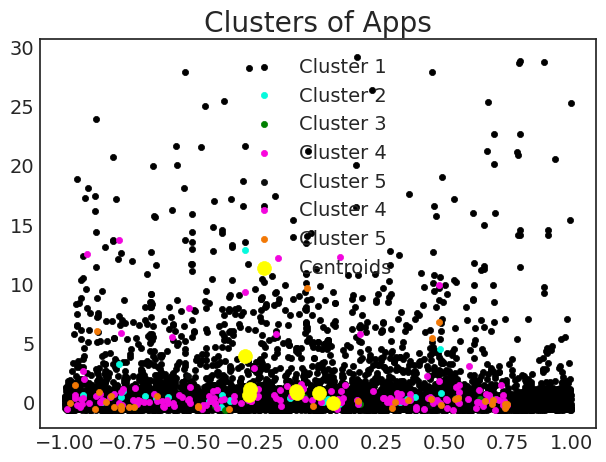

In [77]:
#convert data fram to np.array to avoid error
df_robust = np.array(df_robust) #that all
# Visualising the clusters
plt.scatter(df_robust[y_predict == 0, 0], df_robust[y_predict == 0, 1], s = 20, c = 'black', label = 'Cluster 1')
plt.scatter(df_robust[y_predict == 1, 0], df_robust[y_predict == 1, 1], s = 20, c = '#05fadd', label = 'Cluster 2')
plt.scatter(df_robust[y_predict == 2, 0], df_robust[y_predict == 2, 1], s = 20, c = 'green', label = 'Cluster 3')
plt.scatter(df_robust[y_predict == 3, 0], df_robust[y_predict == 3, 1], s = 20, c = '#fa05dd', label = 'Cluster 4')
plt.scatter(df_robust[y_predict == 4, 0], df_robust[y_predict == 4, 1], s = 20, c = '#0c0d0d', label = 'Cluster 5')

plt.scatter(df_robust[y_predict == 5, 0], df_robust[y_predict == 5, 1], s = 20, c = '#f205de', label = 'Cluster 4')
plt.scatter(df_robust[y_predict == 6, 0], df_robust[y_predict == 6, 1], s = 20, c = '#f27805', label = 'Cluster 5')


plt.scatter(KMeanModel.cluster_centers_[:, 0], KMeanModel.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Apps')
plt.legend()

plt.show()

In [78]:
df_robust

array([[ 2.19627467e-02,  2.69269861e-02,  2.00502513e+00, ...,
         0.00000000e+00,  1.28571429e+00,  0.00000000e+00],
       [-5.37392271e-01,  4.54997800e-01,  0.00000000e+00, ...,
         0.00000000e+00,  3.14285714e+00,  0.00000000e+00],
       [ 6.31915485e-01,  2.49700390e-02,  0.00000000e+00, ...,
         0.00000000e+00,  2.85714286e-01,  0.00000000e+00],
       ...,
       [-8.12621629e-01,  1.04954565e-01,  1.00000000e+00, ...,
        -2.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 5.82429803e-01,  6.14390388e-04,  0.00000000e+00, ...,
        -2.50000000e+00,  1.42857143e-01,  0.00000000e+00],
       [-5.40450375e-01, -4.63295863e-02,  0.00000000e+00, ...,
        -2.50000000e+00,  1.42857143e-01,  0.00000000e+00]])

In [79]:
df_robust = pd.DataFrame(df_robust ,columns=['track_name', 'size_bytes', 'price', 'rating_count_tot',
       'rating_count_ver', 'user_rating', 'user_rating_ver', 'ver',
       'cont_rating', 'prime_genre', 'sup_devices.num', 'ipadSc_urls.num',
       'lang.num', 'vpp_lic'])
df_robust.head()

,track_name,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,0.021963,0.026927,2.005025,7.592043,0.021583,0.0,0.25,1.354795,0.0,0.0,1.0,0.0,1.285714,0.0
1,-0.537392,0.454998,0.000000,58.142857,0.021583,0.0,-0.25,1.539726,0.0,4.0,0.0,0.0,3.142857,0.0
2,0.631915,0.024970,0.000000,68.095118,20.136691,-0.5,0.25,1.123288,0.0,7.5,0.0,0.0,0.285714,0.0
3,0.704754,0.232285,0.000000,94.734539,4.503597,0.0,0.25,1.158904,-2.0,5.0,0.0,0.0,1.142857,0.0
4,-0.853489,-0.032434,0.000000,356.462929,38.107914,0.5,0.50,1.482192,0.0,4.5,0.0,0.0,6.285714,0.0


In [80]:
pre = pd.DataFrame(y_predict ,columns=['cluster'])
pre.head()

,cluster
0,0
1,5
2,5
3,5
4,1
